## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from string import punctuation
import re

## Importing Dataset

In [ ]:
df=pd.read_csv("Mental_Health_FAQ.csv")
df

Question_ID                                          Questions  \
0       1590140        What does it mean to have a mental illness?   
1       2110618                    Who does mental illness affect?   
2       6361820                        What causes mental illness?   
3       9434130  What are some of the warning signs of mental i...   
4       7657263            Can people with mental illness recover?   
..          ...                                                ...   
93      4373204            How do I know if I'm drinking too much?   
94      7807643  If cannabis is dangerous, why are we legalizin...   
95      4352464       How can I convince my kids not to use drugs?   
96      6521784  What is the legal status (and evidence) of CBD...   
97      3221856                    What is the evidence on vaping?   

                                              Answers  
0   Mental illnesses are health conditions that di...  
1   It is estimated that mental illness affects 1 ...  
2   It is estimated that mental illness affects 1 ...  
3   Symptoms of mental health disorders vary depen...  
4   When healing from mental illness, early identi...  
..                                                ...  
93  Sorting out if you are drinking too much can b...  
94  Cannabis smoke, for example, contains cancer-c...  
95  You can't. But you can influence their capacit...  
96  Cannabidiol or CBD is a naturally occurring co...  
97  "Vaping" is the term for using a device where ...  

[98 rows x 3 columns]

In [ ]:
df=df.drop(2)

## Text Pre-processing

In [ ]:
def to_lower(text):
    return text.lower()

In [ ]:
def remove_number(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [ ]:
def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)

In [ ]:
def to_strip(text):
    return " ".join([c for c in text.split() if len(c)>2])

In [ ]:
def remove_char(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text

In [ ]:
def remove_duplicate(text):
    text = re.sub("(.)\\1{2,}", "\\1", text)
    return text

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stopwords.words('english')

def remove_stopwords(text):
    stop_words= stopwords.words('english')

    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lemmatize_words = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [ ]:
#nltk.download('wordnet')

In [ ]:
df_quest = df[['Question_ID', 'Questions']]
df_answ = df[['Question_ID', 'Answers']]

In [ ]:
df_quest['prep1']= df_quest['Questions'].apply(to_lower)
df_quest['prep3']= df_quest['prep1'].apply(remove_number)
df_quest['prep4']= df_quest['prep3'].apply(remove_punct)
df_quest['prep5']= df_quest['prep4'].apply(to_strip)
df_quest['prep6']= df_quest['prep5'].apply(remove_char)
df_quest['prep7']= df_quest['prep6'].apply(remove_duplicate)
df_quest['prep8']= df_quest['prep7'].apply(remove_stopwords)
df_quest['final']= df_quest['prep8'].apply(lemma)
df_quest.head(10)

Question_ID                                          Questions  \
0       1590140        What does it mean to have a mental illness?   
1       2110618                    Who does mental illness affect?   
3       9434130  What are some of the warning signs of mental i...   
4       7657263            Can people with mental illness recover?   
5       1619387  What should I do if I know someone who appears...   
6       1030153  How can I find a mental health professional fo...   
7       8022026              What treatment options are available?   
8       1155199  If I become involved in treatment, what do I n...   
9       7760466  What is the difference between mental health p...   
10      2553795  How can I find a mental health professional ri...   

                                                prep1  \
0         what does it mean to have a mental illness?   
1                     who does mental illness affect?   
3   what are some of the warning signs of mental i...   
4             can people with mental illness recover?   
5   what should i do if i know someone who appears...   
6   how can i find a mental health professional fo...   
7               what treatment options are available?   
8   if i become involved in treatment, what do i n...   
9   what is the difference between mental health p...   
10  how can i find a mental health professional ri...   

                                                prep3  \
0         what does it mean to have a mental illness?   
1                     who does mental illness affect?   
3   what are some of the warning signs of mental i...   
4             can people with mental illness recover?   
5   what should i do if i know someone who appears...   
6   how can i find a mental health professional fo...   
7               what treatment options are available?   
8   if i become involved in treatment, what do i n...   
9   what is the difference between mental health p...   
10  how can i find a mental health professional ri...   

                                                prep4  \
0          what does it mean to have a mental illness   
1                      who does mental illness affect   
3   what are some of the warning signs of mental i...   
4              can people with mental illness recover   
5   what should i do if i know someone who appears...   
6   how can i find a mental health professional fo...   
7                what treatment options are available   
8   if i become involved in treatment what do i ne...   
9   what is the difference between mental health p...   
10  how can i find a mental health professional ri...   

                                                prep5  \
0                  what does mean have mental illness   
1                      who does mental illness affect   
3      what are some the warning signs mental illness   
4              can people with mental illness recover   
5   what should know someone who appears have the ...   
6   how can find mental health professional for my...   
7                what treatment options are available   
8            become involved treatment what need know   
9   what the difference between mental health prof...   
10  how can find mental health professional right ...   

                                                prep6  \
0                  what does mean have mental illness   
1                      who does mental illness affect   
3      what are some the warning signs mental illness   
4              can people with mental illness recover   
5   what should know someone who appears have the ...   
6   how can find mental health professional for my...   
7                what treatment options are available   
8            become involved treatment what need know   
9   what the difference between mental health prof...   
10  how can find mental health professional right ...   

                                                prep7  \
0                  what does mean ha

In [ ]:
df_answ['prep1']= df_answ['Answers'].apply(to_lower)
df_answ['prep3']= df_answ['prep1'].apply(remove_number)
df_answ['prep4']= df_answ['prep3'].apply(remove_punct)
df_answ['prep5']= df_answ['prep4'].apply(to_strip)
df_answ['prep6']= df_answ['prep5'].apply(remove_char)
df_answ['prep7']= df_answ['prep6'].apply(remove_duplicate)
df_answ['prep8']= df_answ['prep7'].apply(remove_stopwords)
df_answ['final']= df_answ['prep8'].apply(lemma)
df_answ.head(10)

Question_ID                                            Answers  \
0       1590140  Mental illnesses are health conditions that di...   
1       2110618  It is estimated that mental illness affects 1 ...   
3       9434130  Symptoms of mental health disorders vary depen...   
4       7657263  When healing from mental illness, early identi...   
5       1619387  Although this website cannot substitute for pr...   
6       1030153  Feeling comfortable with the professional you ...   
7       8022026  Just as there are different types of medicatio...   
8       1155199  Since beginning treatment is a big step for in...   
9       7760466  There are many types of mental health professi...   
10      2553795  Feeling comfortable with the professional you ...   

                                                prep1  \
0   mental illnesses are health conditions that di...   
1   it is estimated that mental illness affects 1 ...   
3   symptoms of mental health disorders vary depen...   
4   when healing from mental illness, early identi...   
5   although this website cannot substitute for pr...   
6   feeling comfortable with the professional you ...   
7   just as there are different types of medicatio...   
8   since beginning treatment is a big step for in...   
9   there are many types of mental health professi...   
10  feeling comfortable with the professional you ...   

                                                prep3  \
0   mental illnesses are health conditions that di...   
1   it is estimated that mental illness affects  i...   
3   symptoms of mental health disorders vary depen...   
4   when healing from mental illness, early identi...   
5   although this website cannot substitute for pr...   
6   feeling comfortable with the professional you ...   
7   just as there are different types of medicatio...   
8   since beginning treatment is a big step for in...   
9   there are many types of mental health professi...   
10  feeling comfortable with the professional you ...   

                                                prep4  \
0   mental illnesses are health conditions that di...   
1   it is estimated that mental illness affects  i...   
3   symptoms of mental health disorders vary depen...   
4   when healing from mental illness early identif...   
5   although this website cannot substitute for pr...   
6   feeling comfortable with the professional you ...   
7   just as there are different types of medicatio...   
8   since beginning treatment is a big step for in...   
9   there are many types of mental health professi...   
10  feeling comfortable with the professional you ...   

                                                prep5  \
0   mental illnesses are health conditions that di...   
1   estimated that mental illness affects adults a...   
3   symptoms mental health disorders vary dependin...   
4   when healing from mental illness early identif...   
5   although this website cannot substitute for pr...   
6   feeling comfortable with the professional you ...   
7   just there are different types medications for...   
8   since beginning treatment big step for individ...   
9   there are many types mental health professiona...   
10  feeling comfortable with the professional you ...   

                                                prep6  \
0   mental illnesses are health conditions that di...   
1   estimated that mental illness affects adults a...   
3   symptoms mental health disorders vary dependin...   
4   when healing from mental illness early identif...   
5   although this website cannot substitute for pr...   
6   feeling comfortable with the professional you ...   
7   just there are different types medications for...   
8   since beginning treatment big step for individ...   
9   there are many types mental health professiona...   
10  feeling comfortable with the professional you ...   

                                                prep7  \
0   mental illnesses are health cond

##Text Exploration

In [ ]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [ ]:
from nltk import FreqDist

In [ ]:
# Function to calculate word frequencies
def calculate_word_frequencies(tokens_list):

    # Calculate word frequencies
    freq_dist = FreqDist(tokens_list)

    return freq_dist

# Print the word frequencies for each row
def print_frequencies(df_name):
  for index, row in df_name.iterrows():
    print(f"Word frequencies for row {index}:")
    print(row['word_frequencies'])
    for word, freq in row['word_frequencies'].items():
        print(f"{word}: {freq}")
    print("\n")


In [ ]:
df_quest['tokens'] = df_quest['final'].apply(tokenize_text)

In [ ]:
# Apply the word frequency analysis function to the 'tokens' column
df_quest['word_frequencies'] = df_quest['tokens'].apply(calculate_word_frequencies)
print_frequencies(df_quest)

Word frequencies for row 0:
<FreqDist with 3 samples and 3 outcomes>
mean: 1
mental: 1
illness: 1


Word frequencies for row 1:
<FreqDist with 3 samples and 3 outcomes>
mental: 1
illness: 1
affect: 1


Word frequencies for row 3:
<FreqDist with 4 samples and 4 outcomes>
sign: 1
mental: 1
illness: 1


Word frequencies for row 4:
<FreqDist with 4 samples and 4 outcomes>
people: 1
mental: 1
illness: 1
recover: 1


Word frequencies for row 5:
<FreqDist with 6 samples and 6 outcomes>
know: 1
someone: 1
appears: 1
symptom: 1
mental: 1
disorder: 1


Word frequencies for row 6:
<FreqDist with 5 samples and 5 outcomes>
find: 1
mental: 1
health: 1
professional: 1
child: 1


Word frequencies for row 7:
<FreqDist with 3 samples and 3 outcomes>
treatment: 1
option: 1
available: 1


Word frequencies for row 8:
<FreqDist with 5 samples and 5 outcomes>
become: 1
involved: 1
treatment: 1
need: 1
know: 1


Word frequencies for row 9:
<FreqDist with 4 samples and 4 outcomes>
difference: 1
mental: 1
healt

In [ ]:
df_answ['tokens'] = df_answ['final'].apply(tokenize_text)

In [ ]:
# Apply the word frequency analysis function to the 'tokens' column
df_answ['word_frequencies'] = df_answ['tokens'].apply(calculate_word_frequencies)
print_frequencies(df_answ)

Streaming output truncated to the last 5000 lines.
clinical: 1
counsellor: 1
provider: 2
sliding: 2
scale: 2
mean: 1
cost: 1
based: 1
income: 1
try: 2
contacting: 1
directly: 1
one: 1
vancouver: 2
list: 2
lowercost: 1
option: 1
outside: 1
lower: 1
mainland: 1
still: 1
see: 1
similar: 1
organization: 2
might: 1
contact: 1
anxiety: 1
canada: 1
canadian: 1
association: 2
schizophrenia: 1
society: 1
institute: 1
family: 1
child: 1
youth: 1
mood: 1
disorder: 1
jessies: 1
legacy: 1
connection: 1
email: 1
well: 1
give: 1
recommendation: 1


Word frequencies for row 54:
<FreqDist with 28 samples and 33 outcomes>
pharmacare: 1
cover: 1
cost: 1
medication: 3
plan: 3
psychiatric: 1
people: 1
need: 1
well: 1
afford: 1
doctor: 1
nurse: 1
practitioner: 1
must: 1
apply: 1
coverage: 2
behalf: 1
usually: 1
last: 1
one: 1
year: 1
reapply: 1
needed: 1
talk: 1
care: 1
team: 1
youre: 1
interested: 1


Word frequencies for row 55:
<FreqDist with 96 samples and 156 outcomes>
mental: 8
health: 13
service: 10


In [ ]:
import matplotlib.pyplot as plt

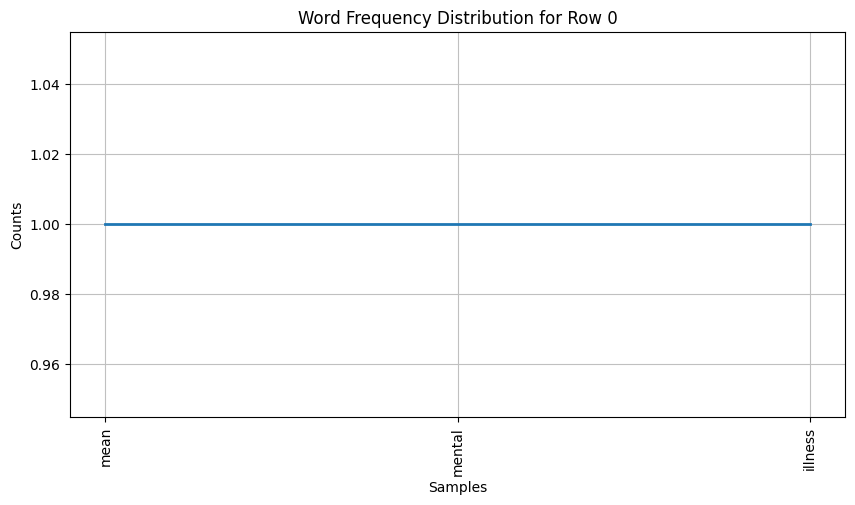

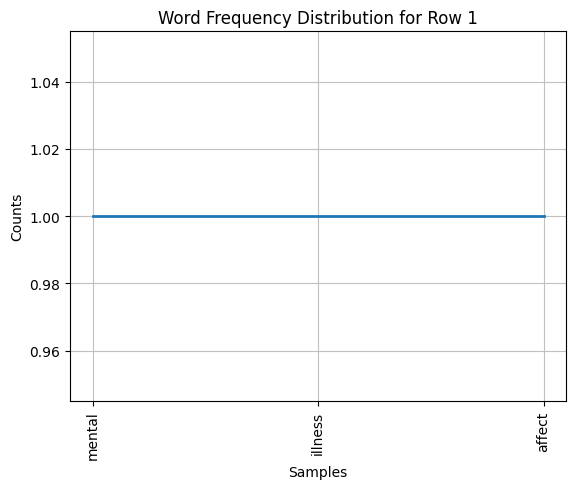

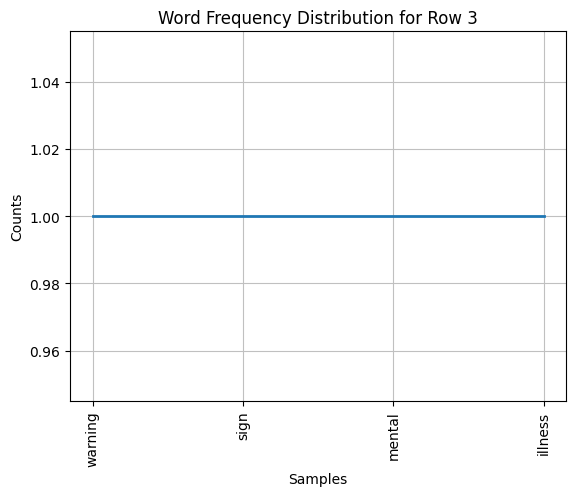

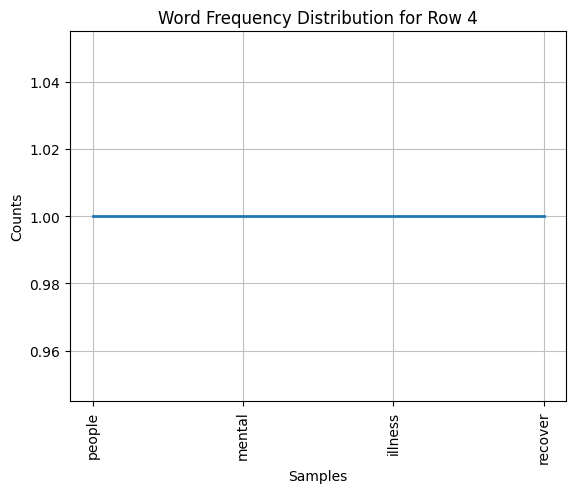

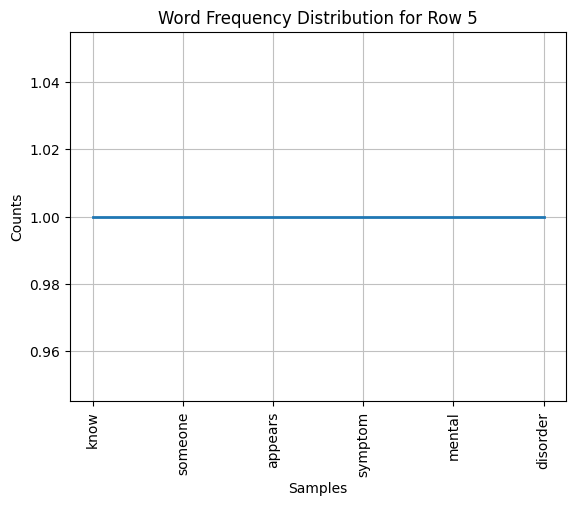

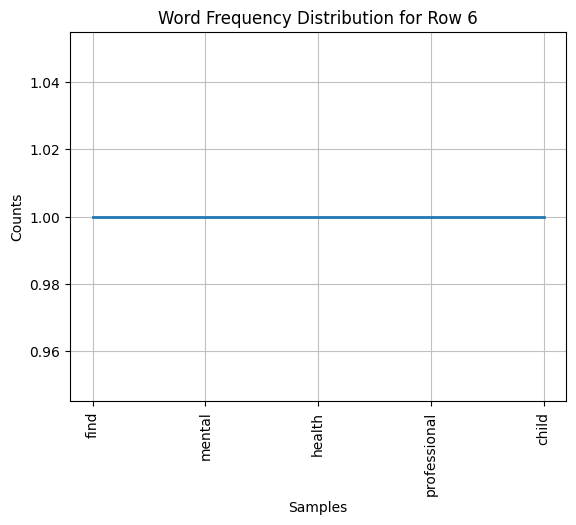

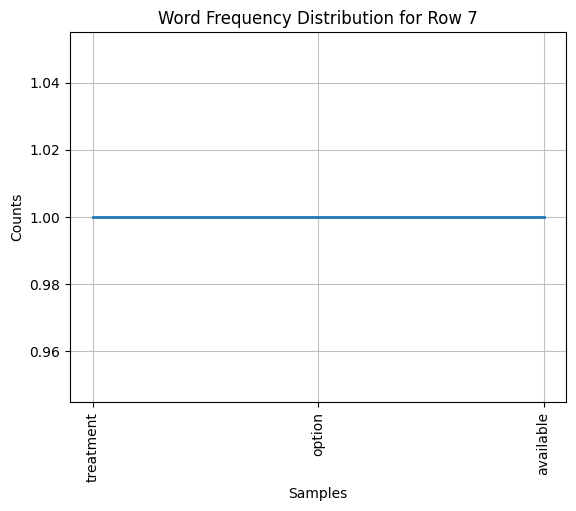

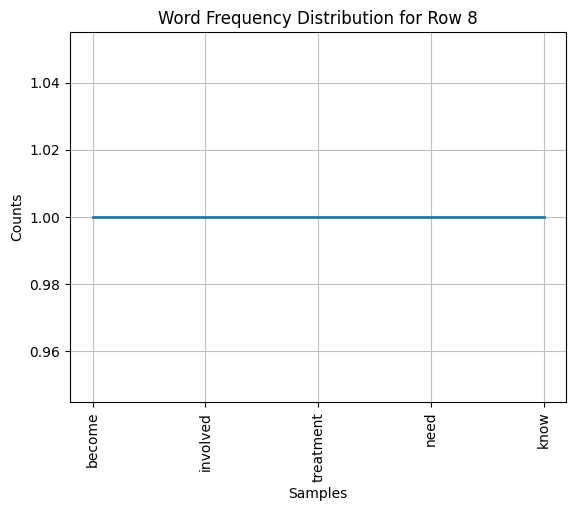

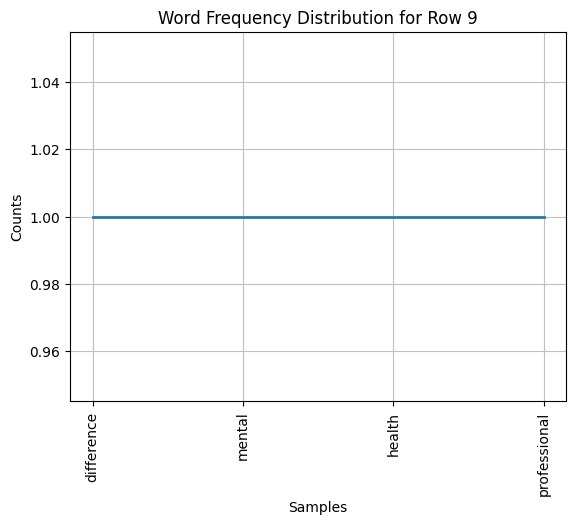

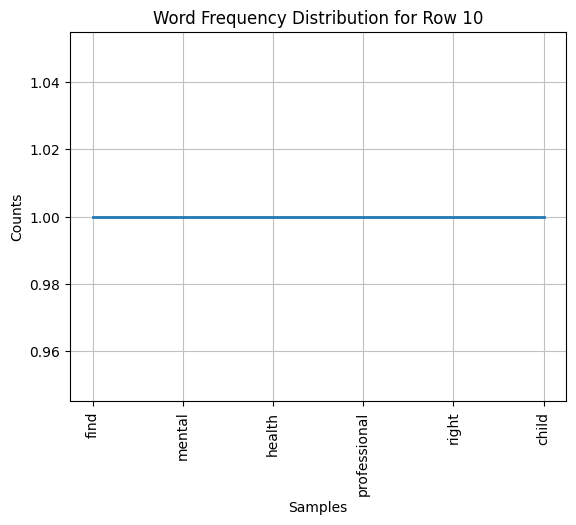

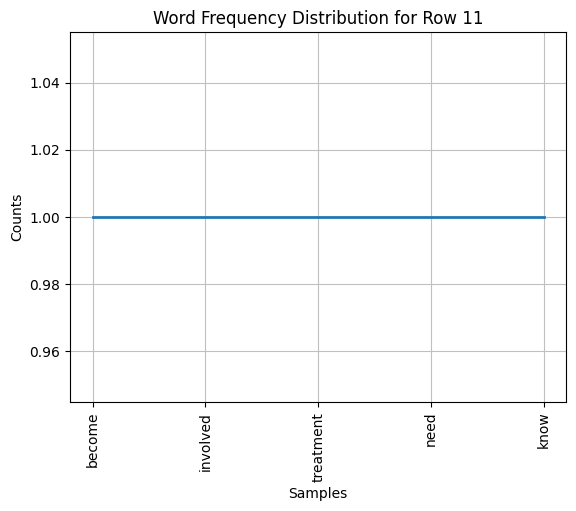

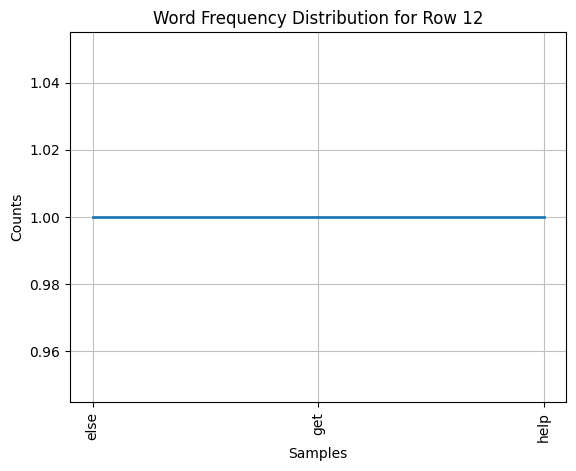

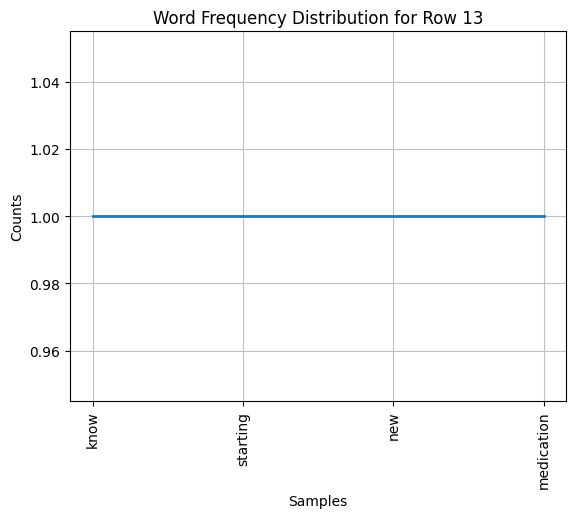

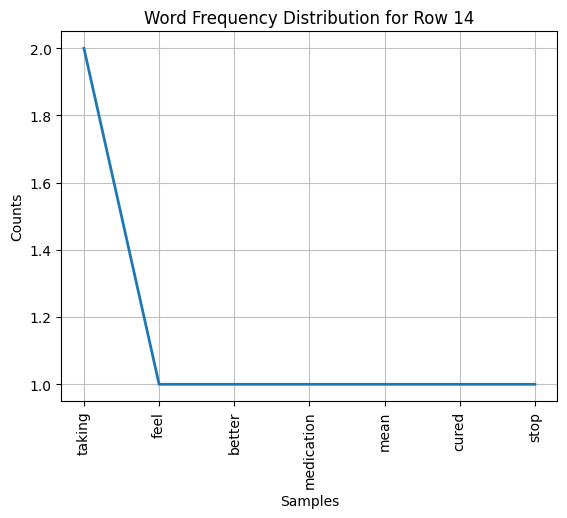

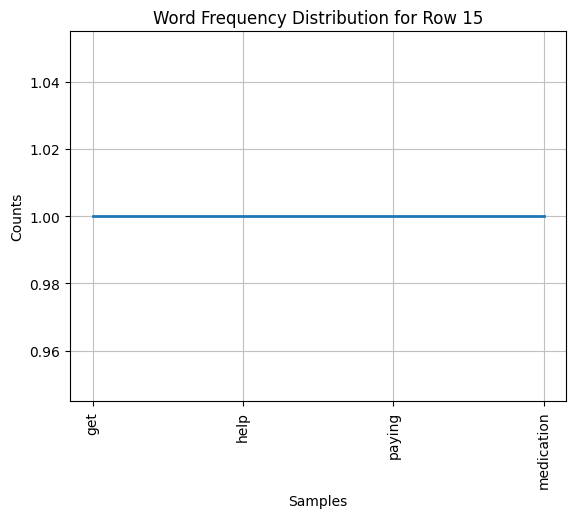

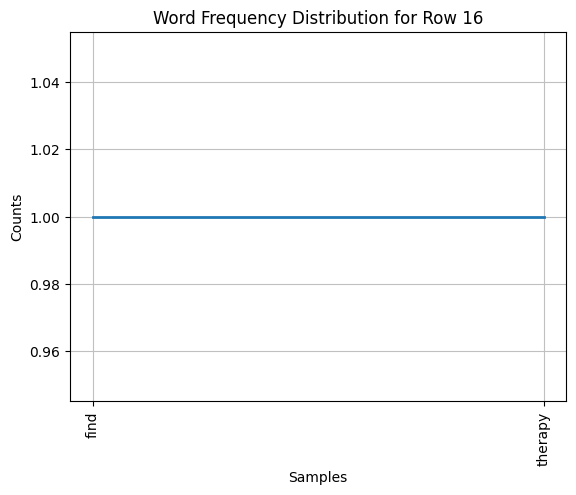

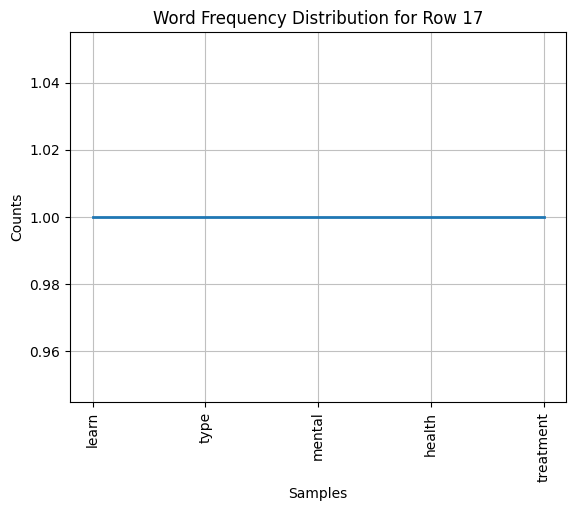

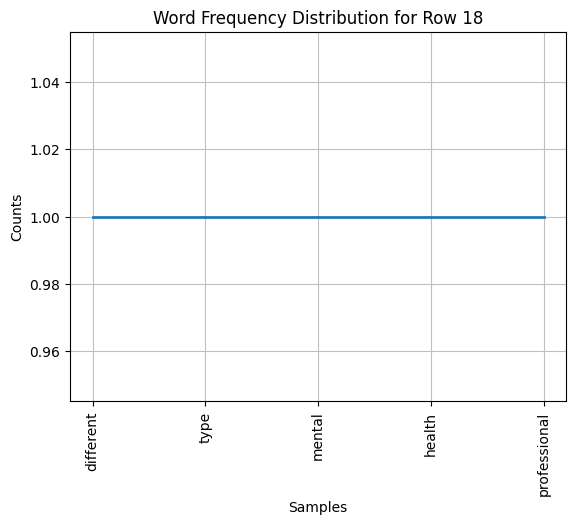

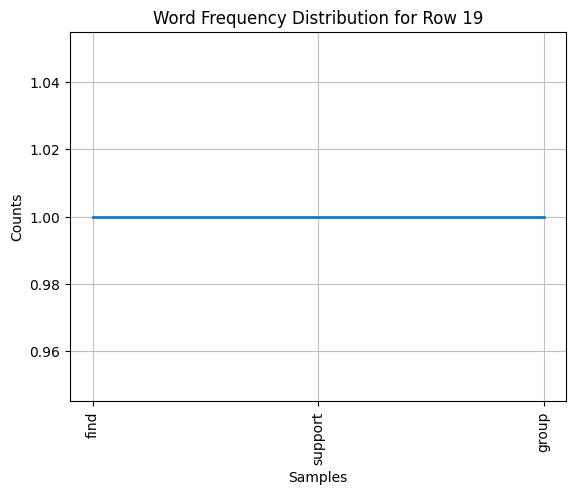

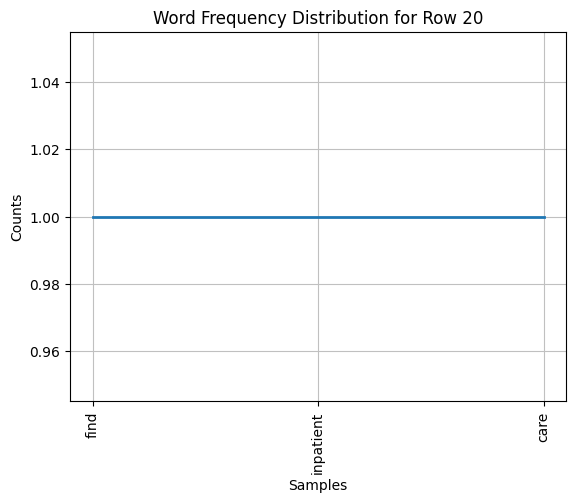

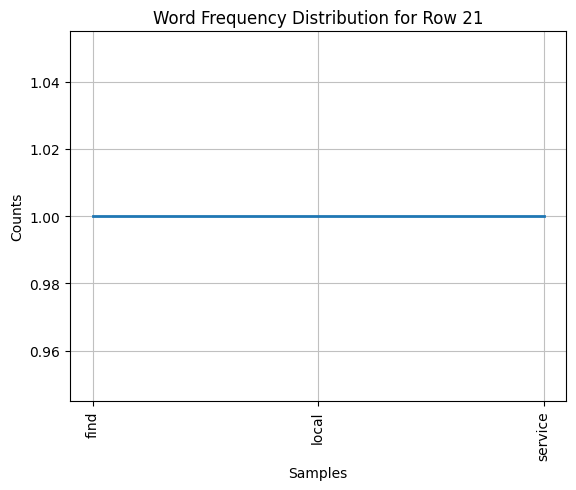

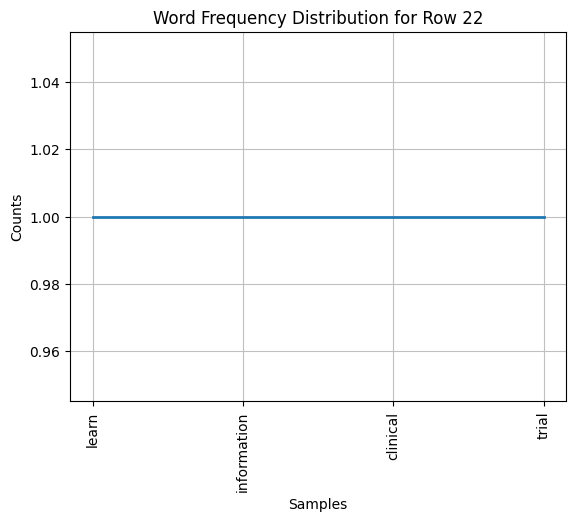

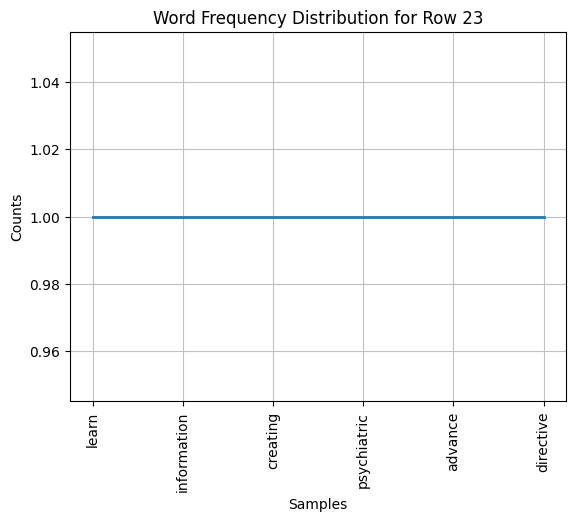

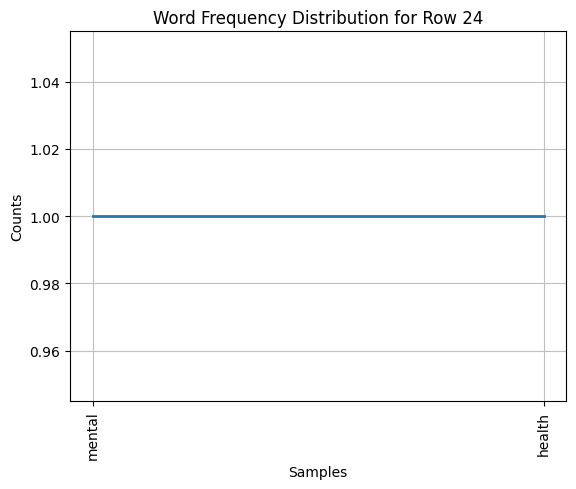

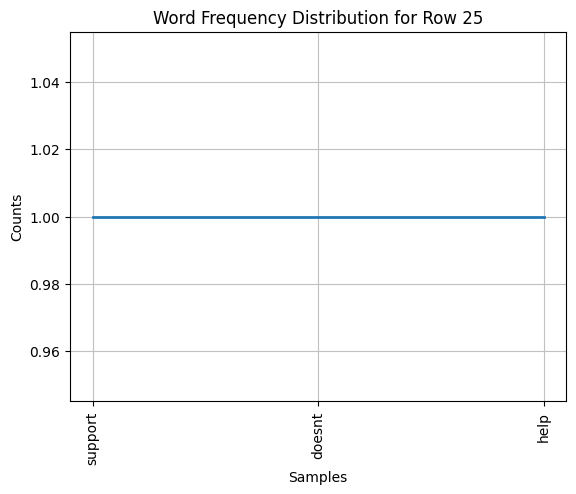

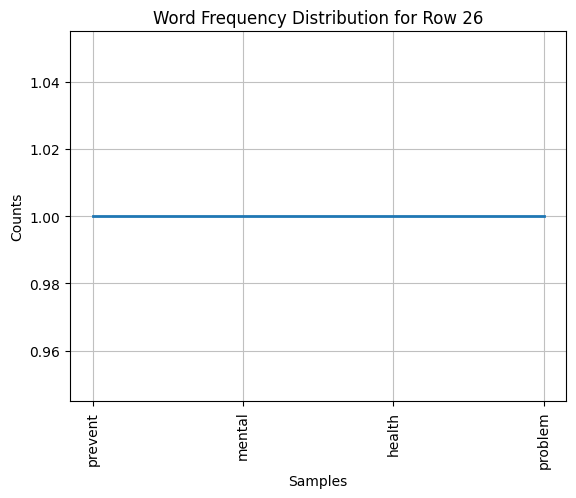

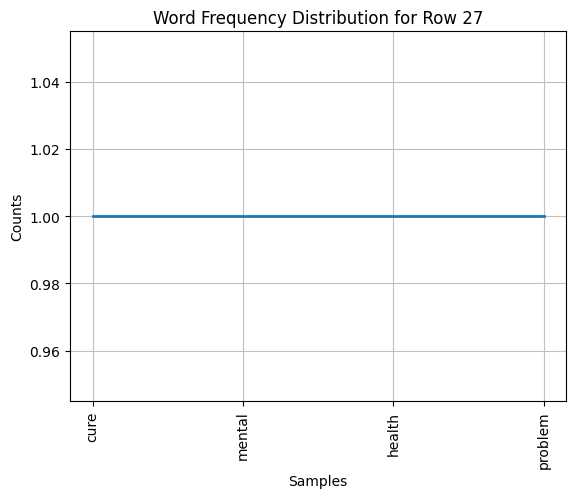

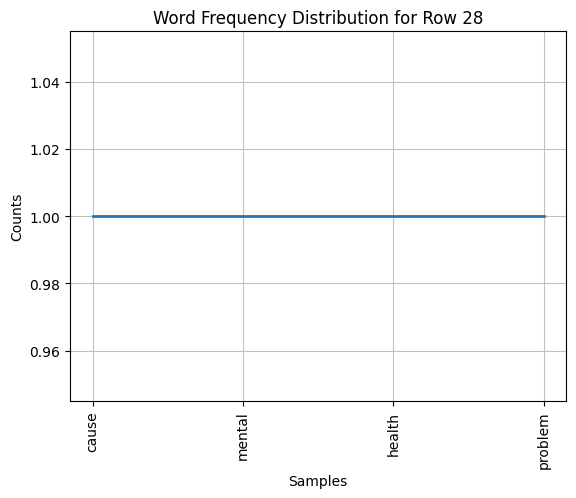

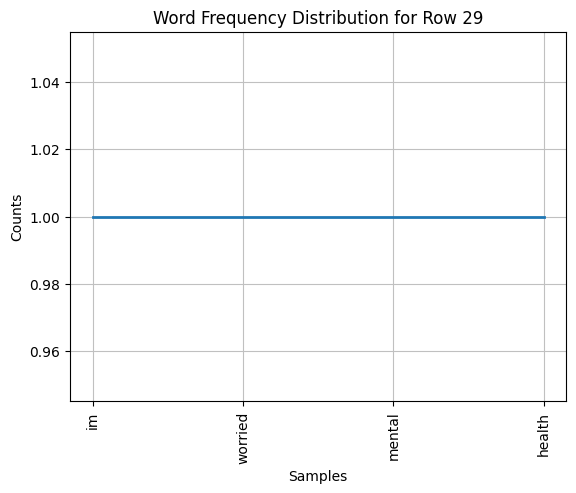

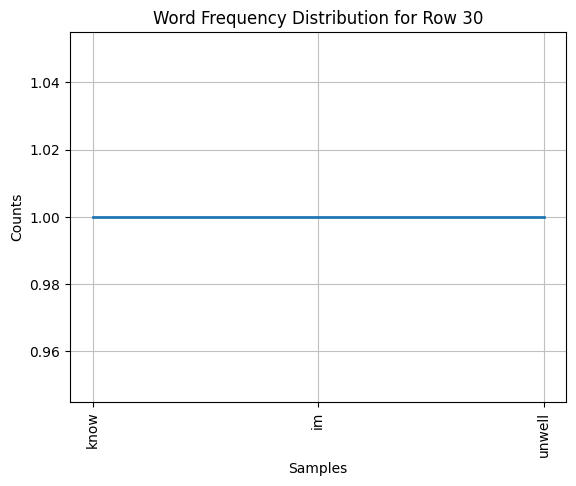

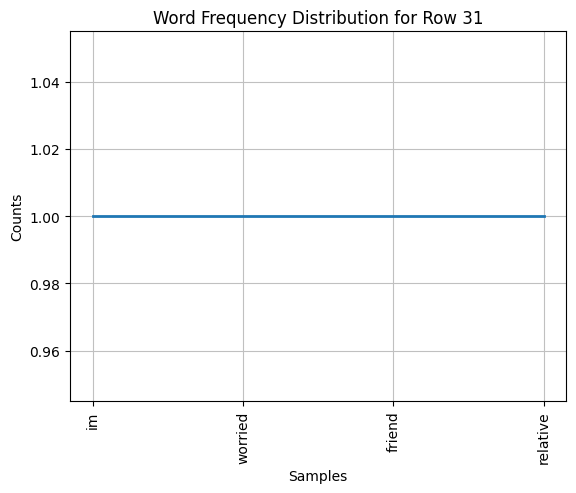

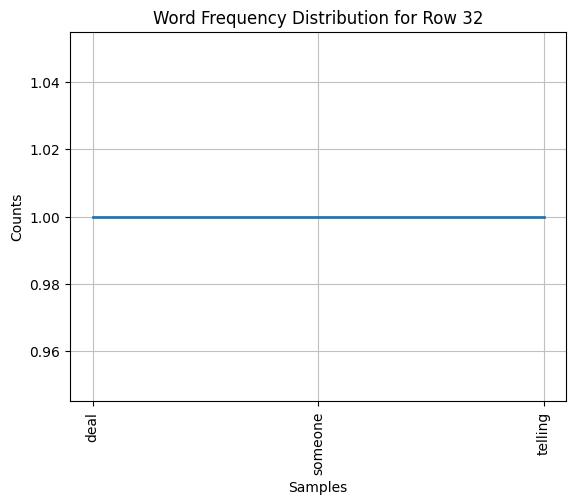

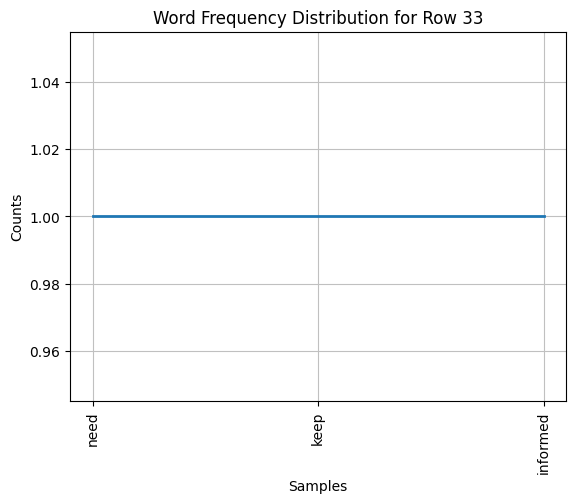

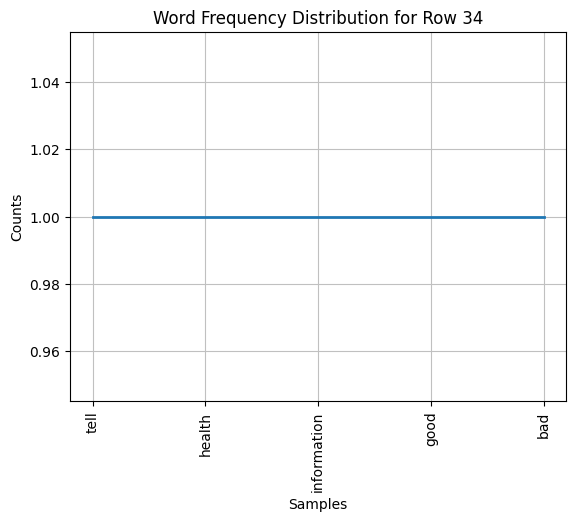

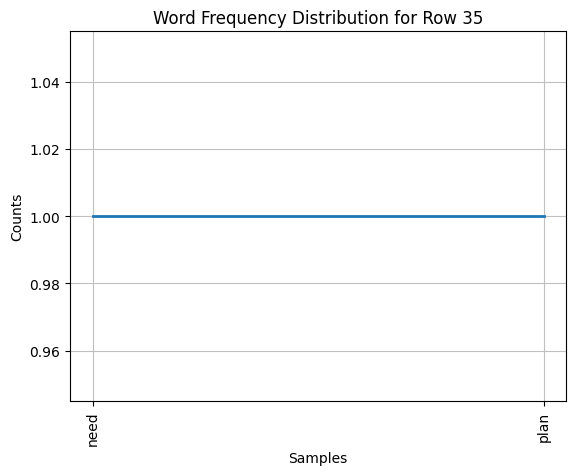

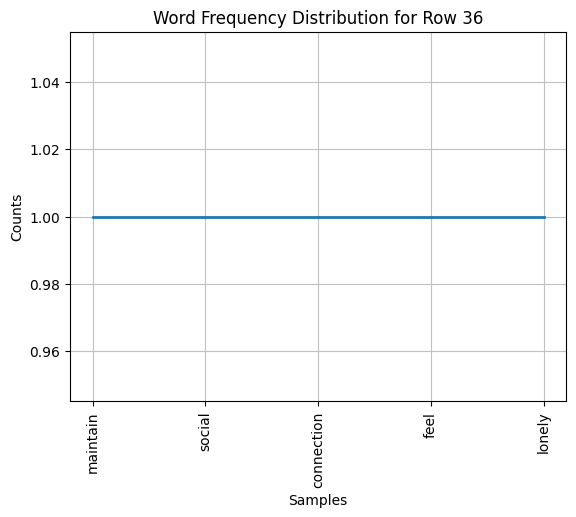

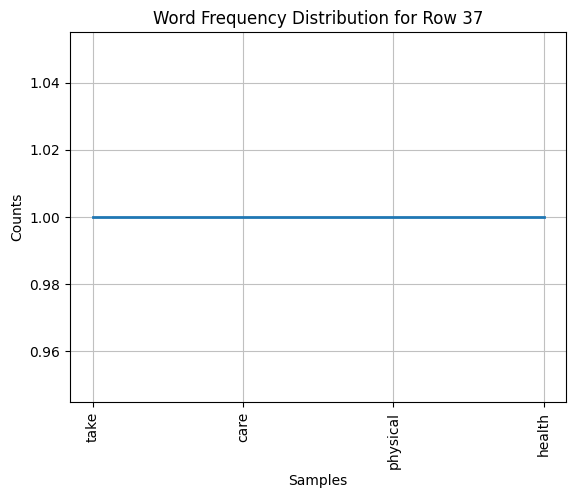

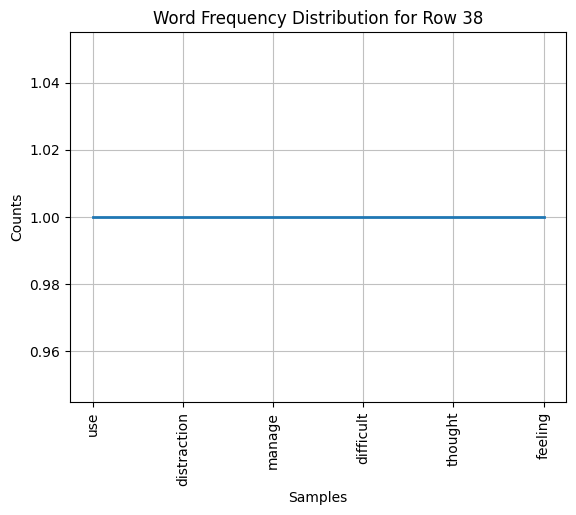

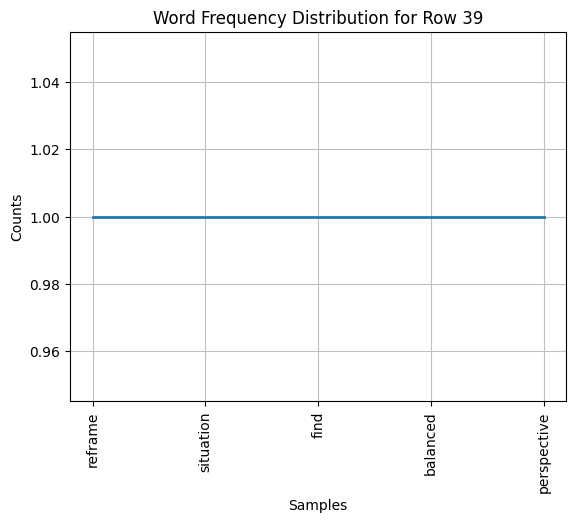

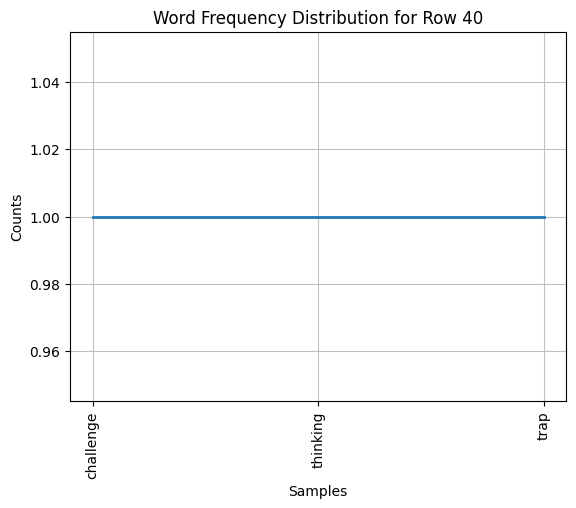

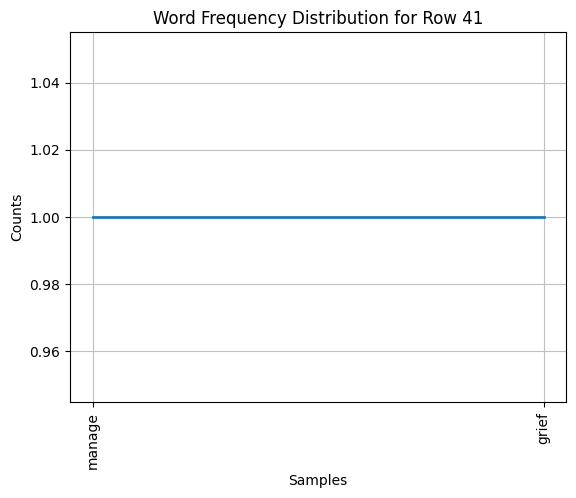

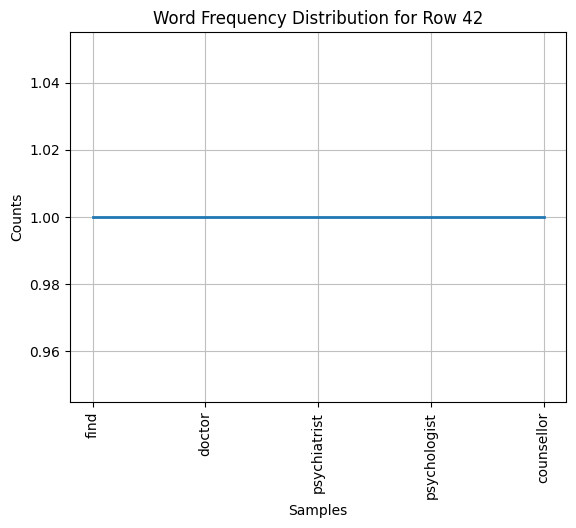

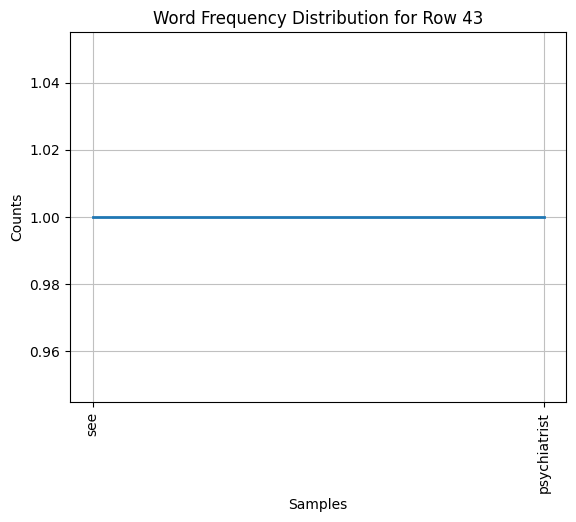

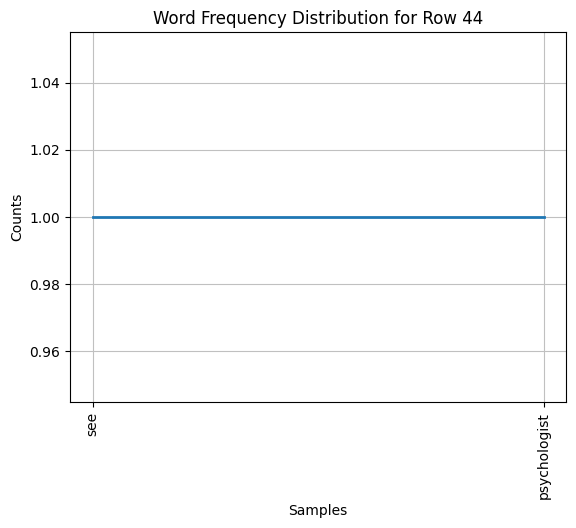

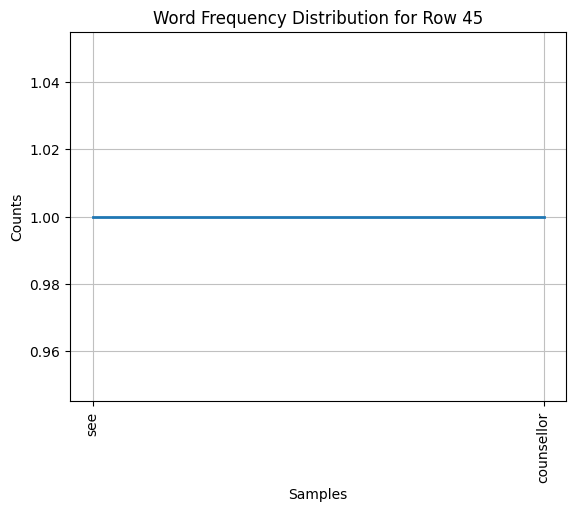

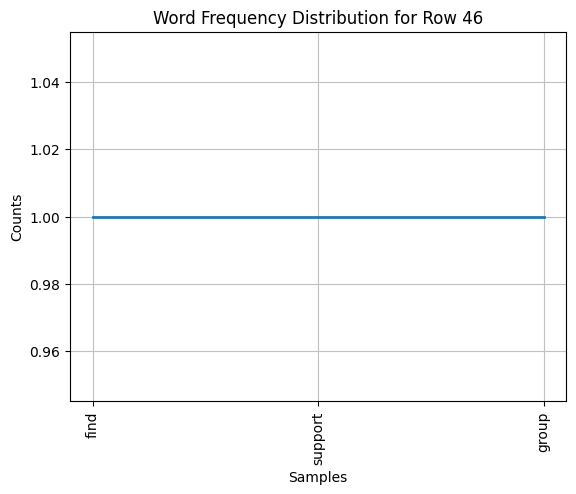

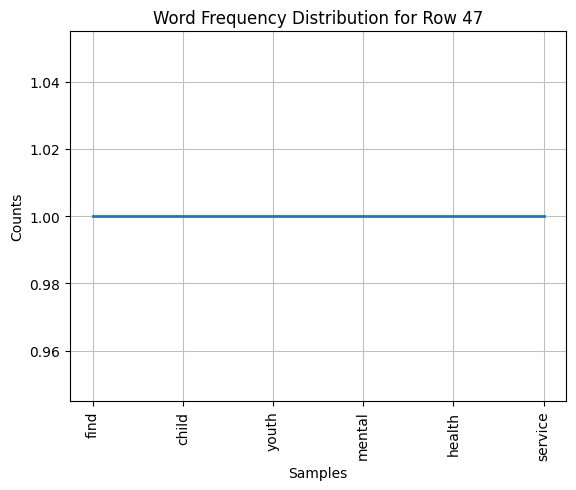

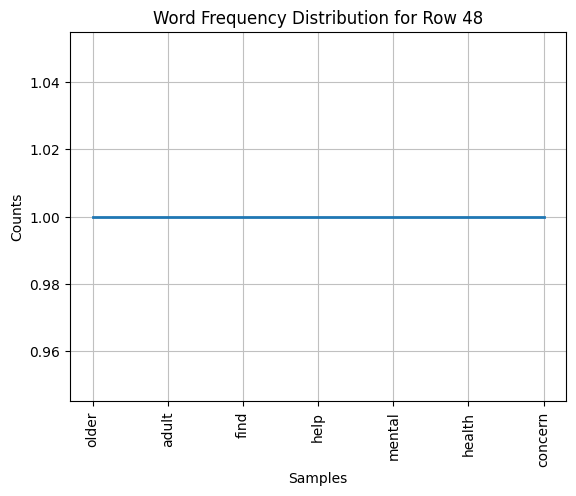

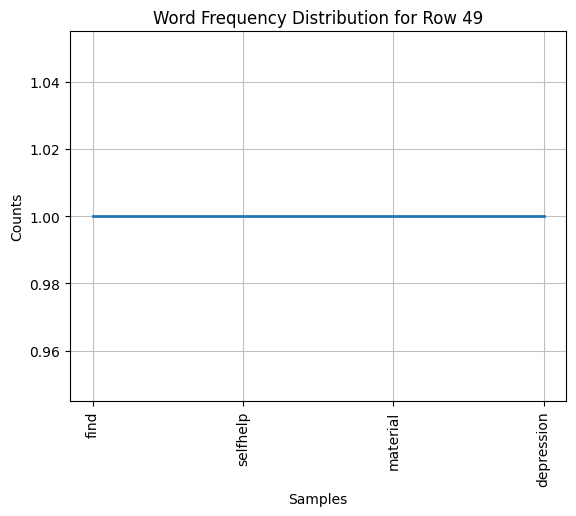

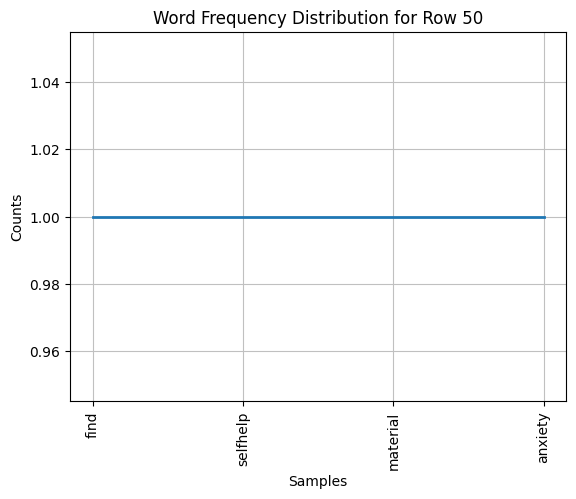

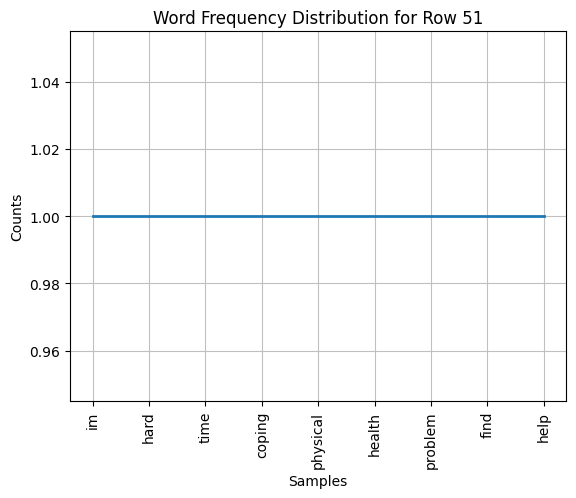

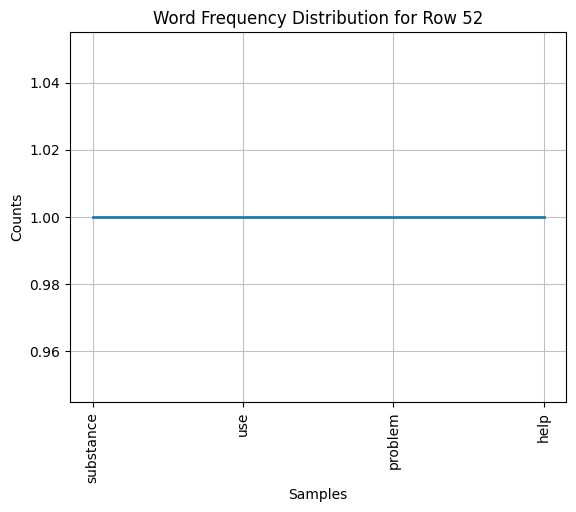

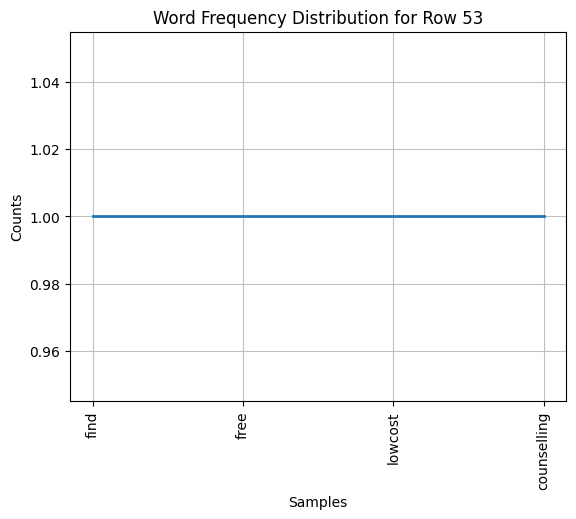

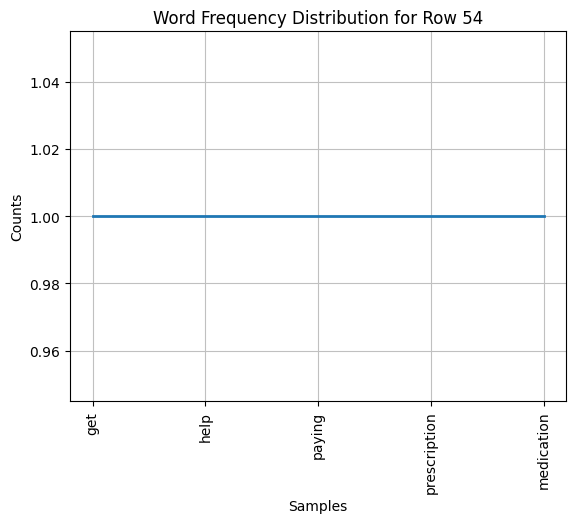

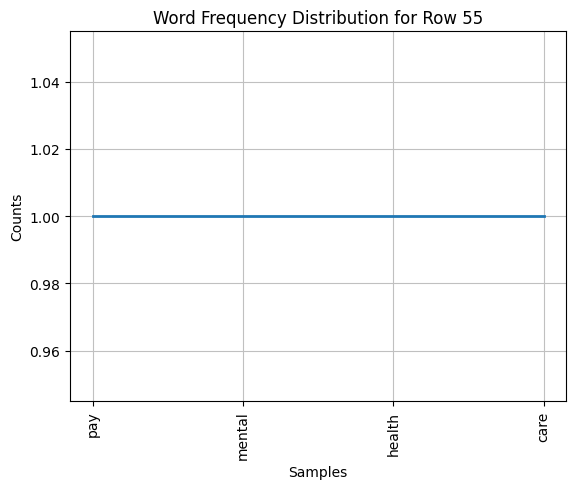

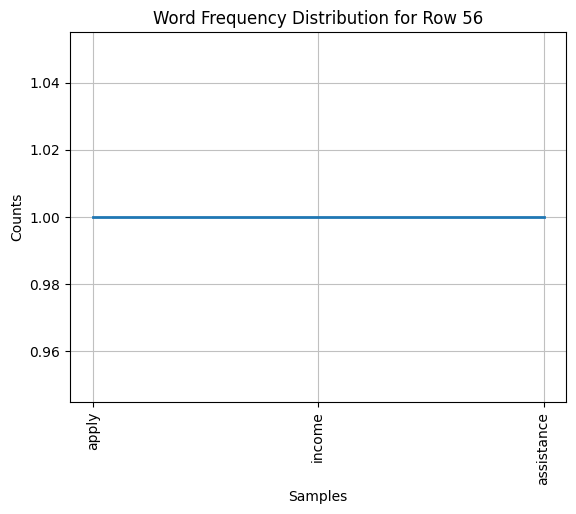

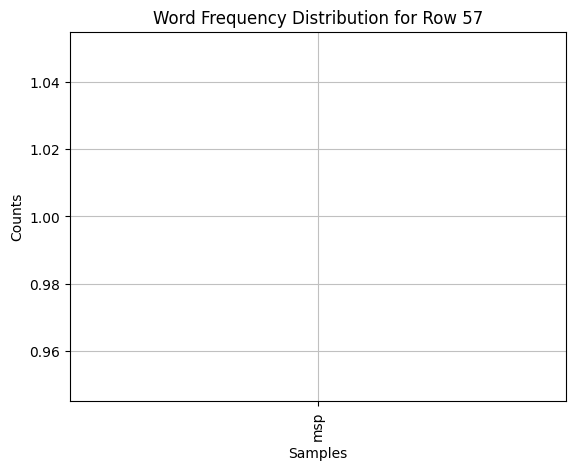

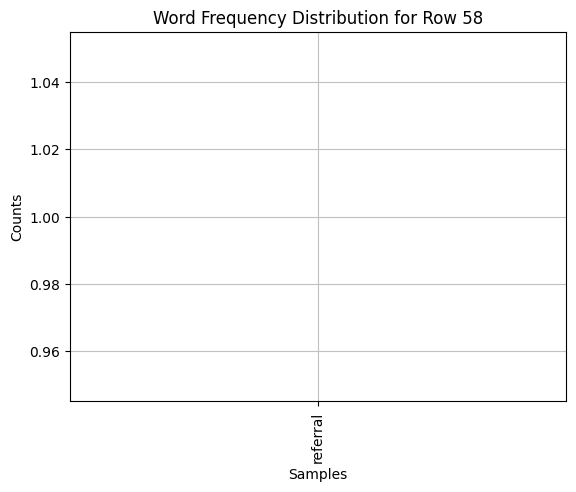

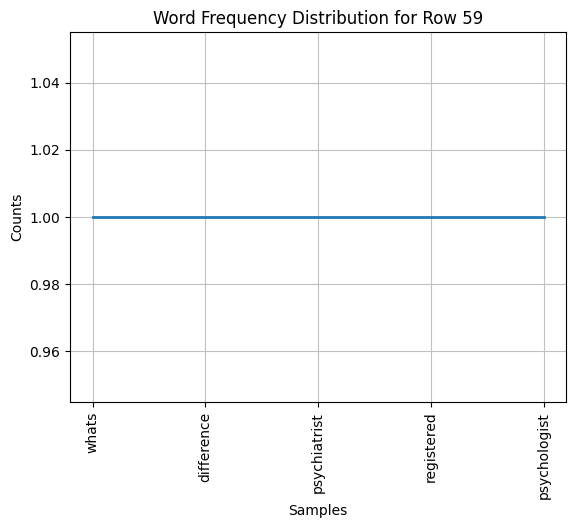

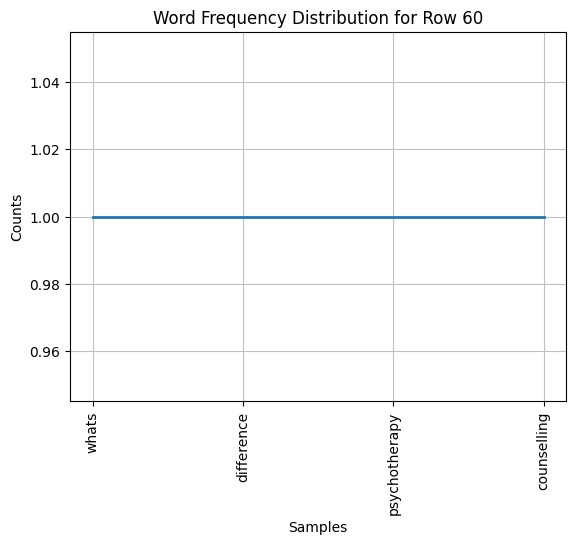

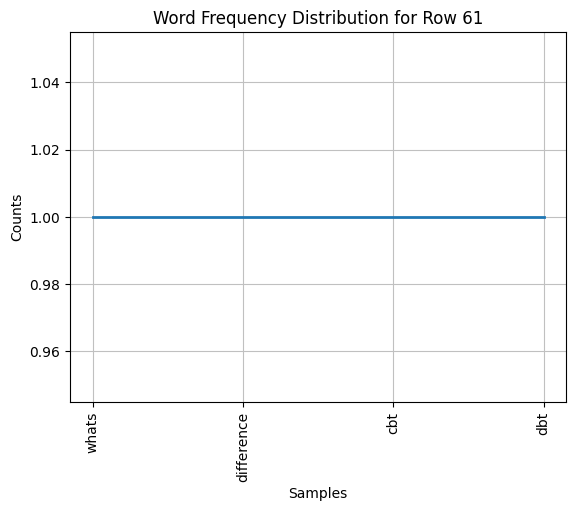

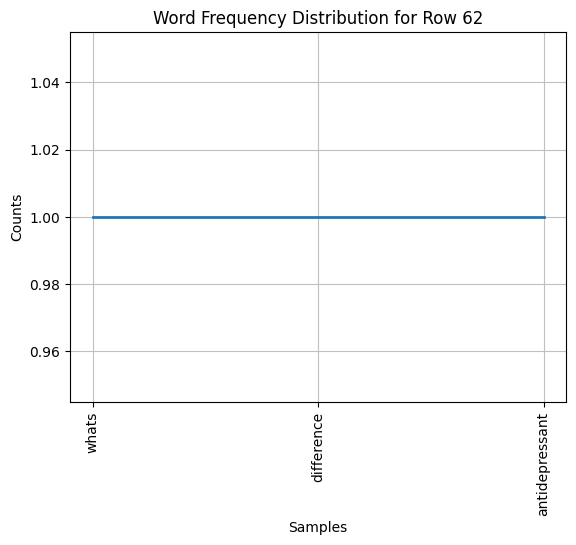

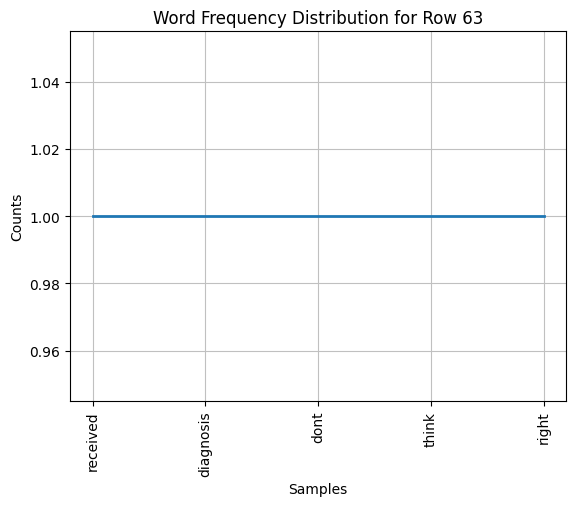

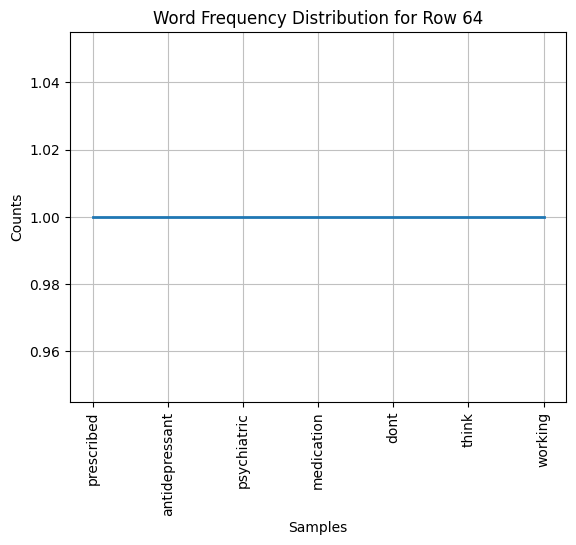

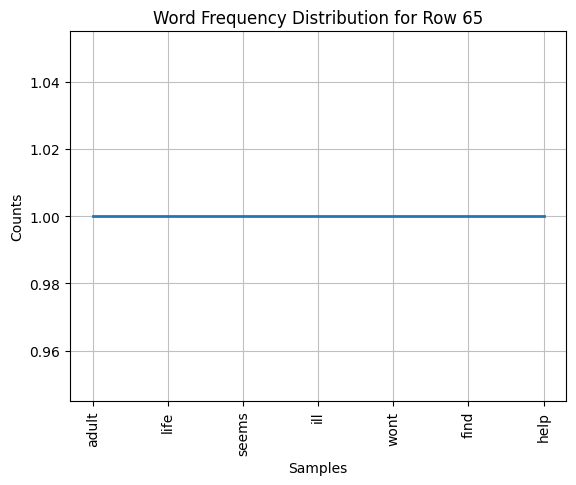

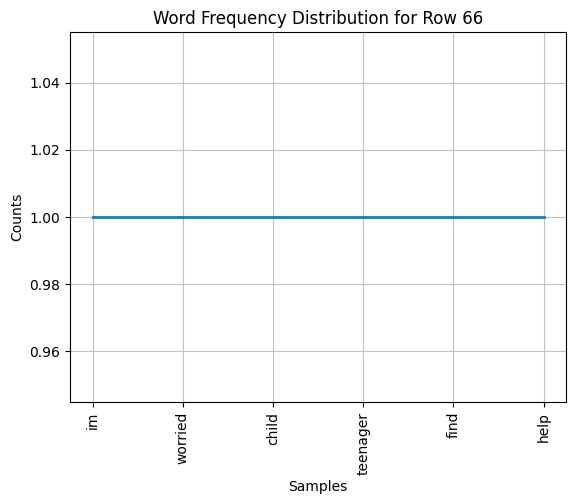

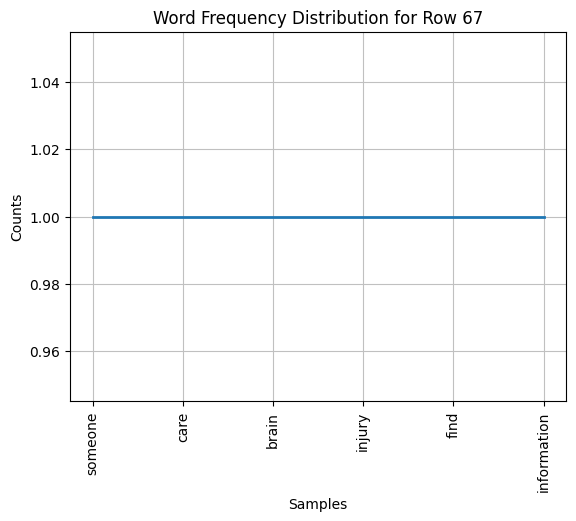

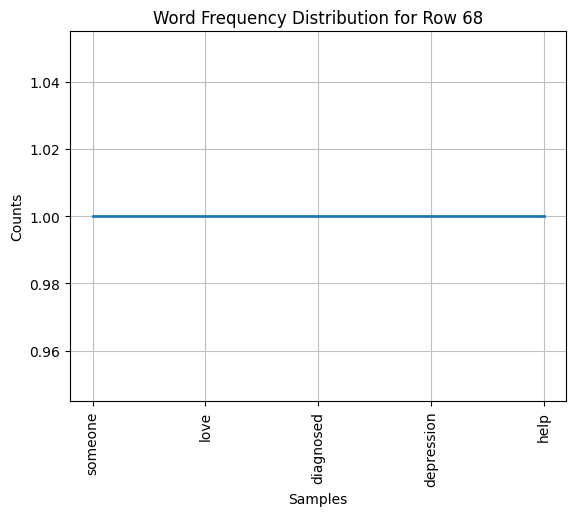

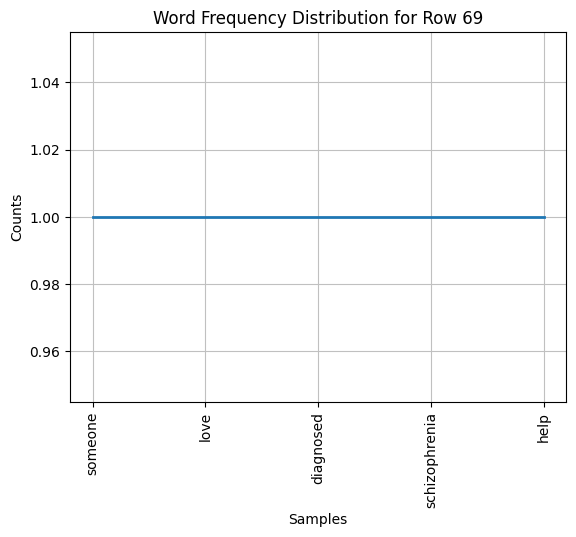

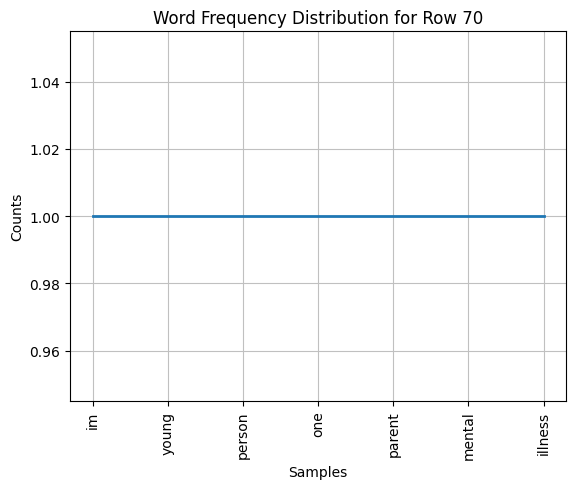

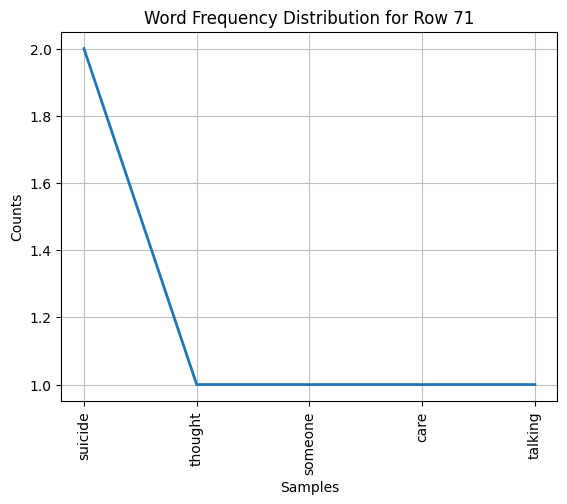

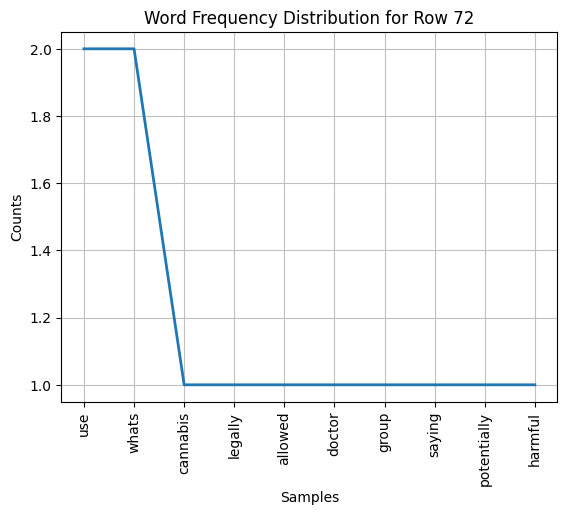

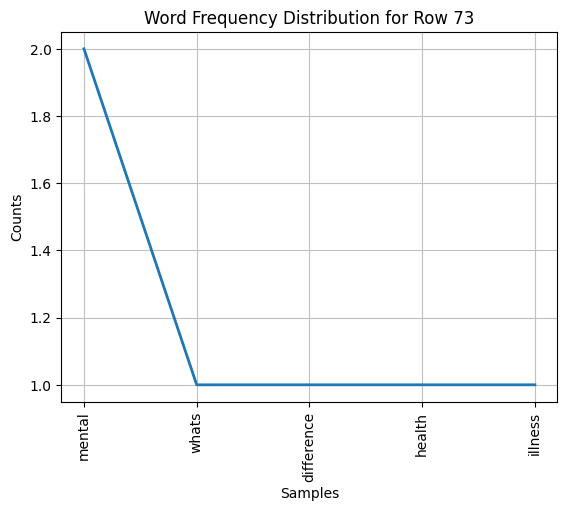

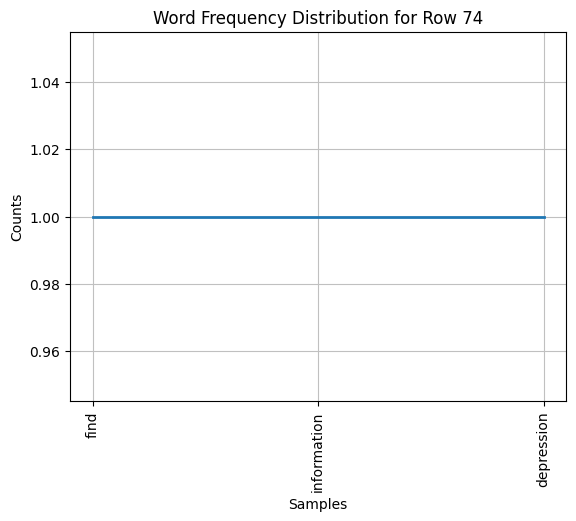

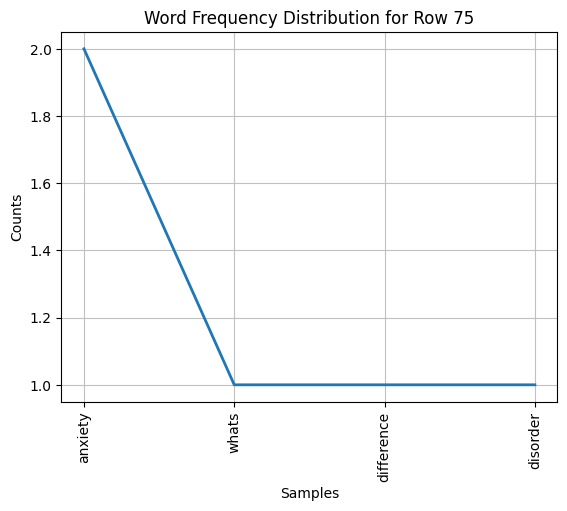

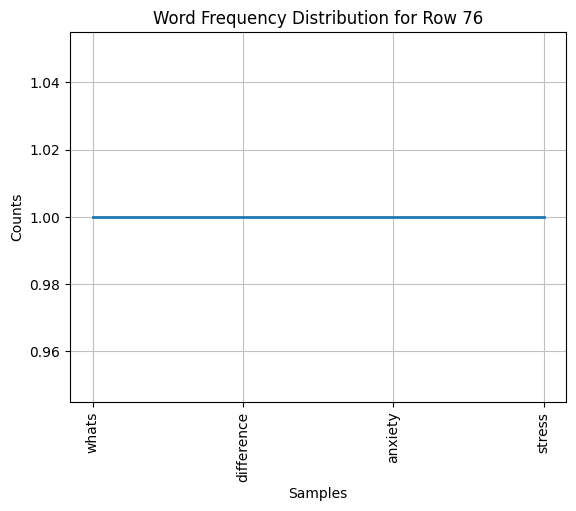

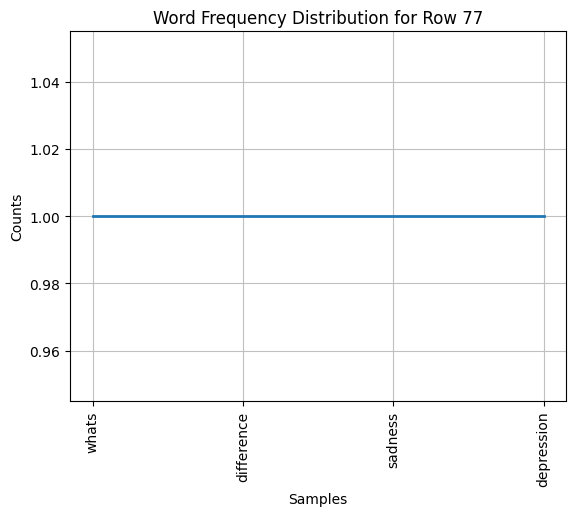

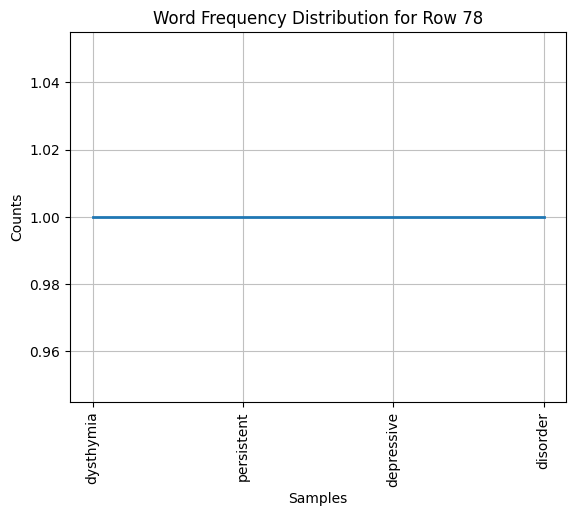

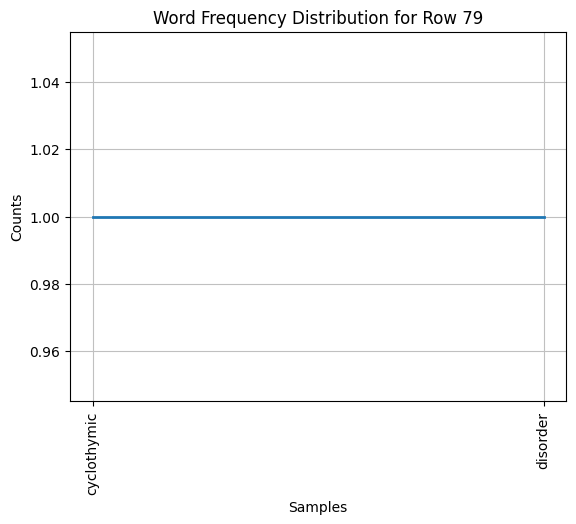

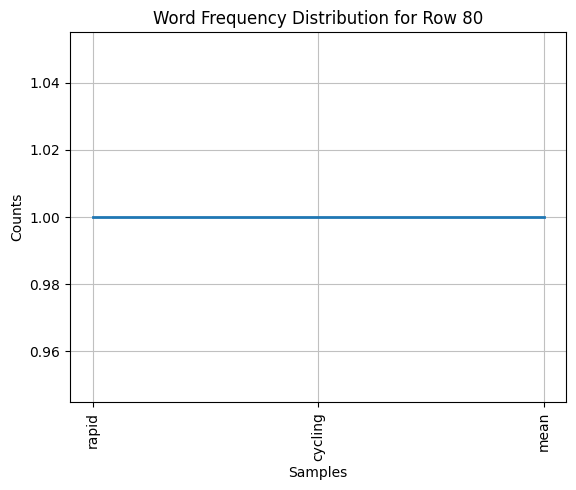

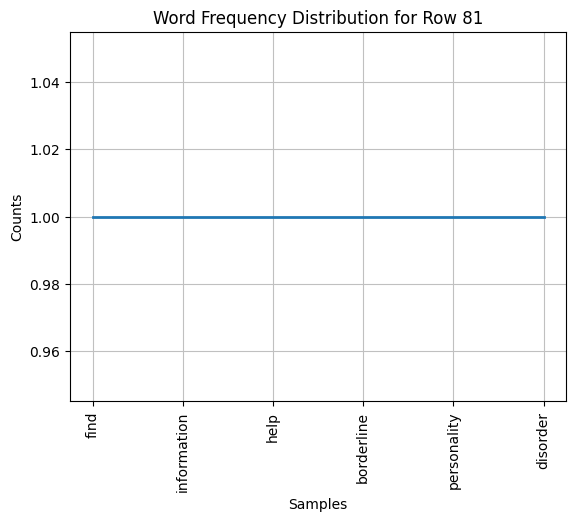

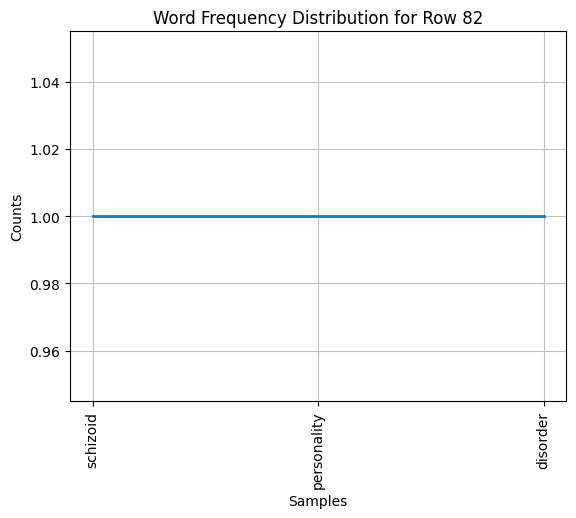

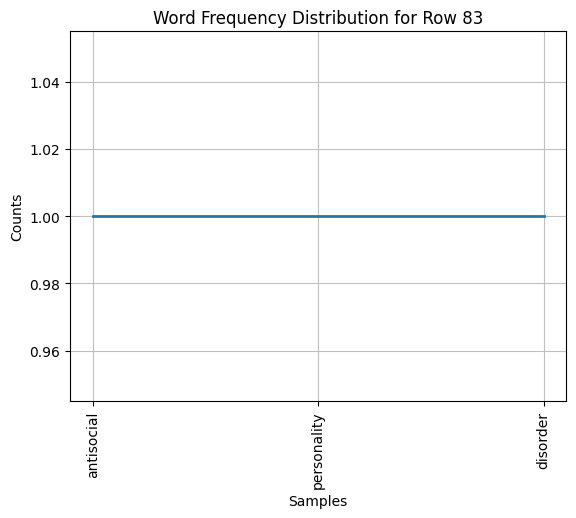

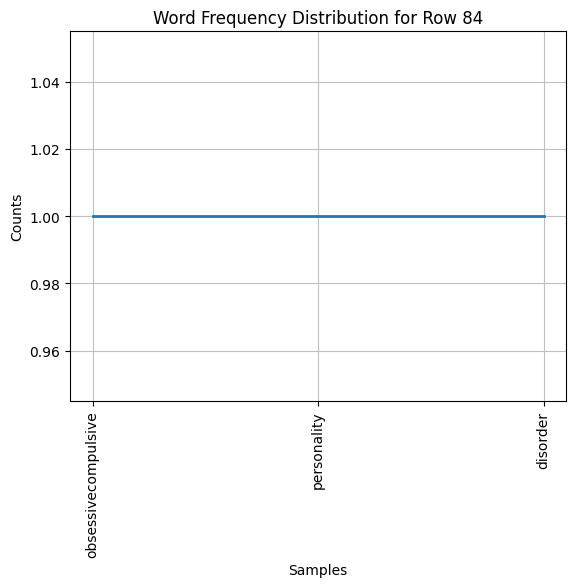

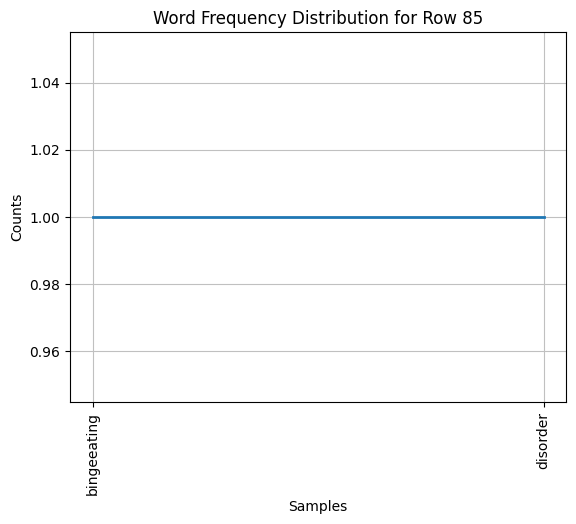

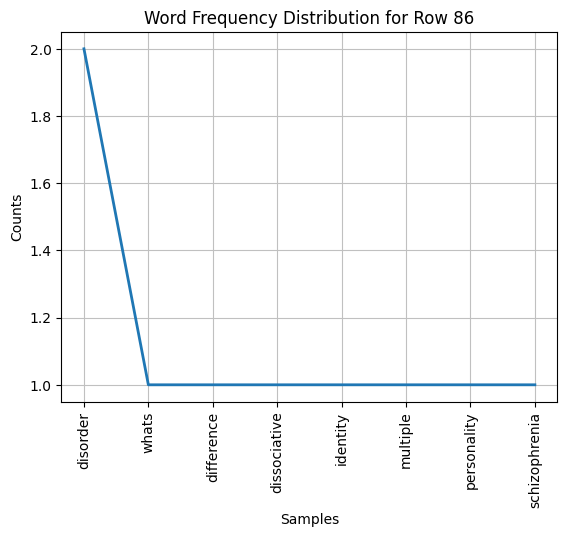

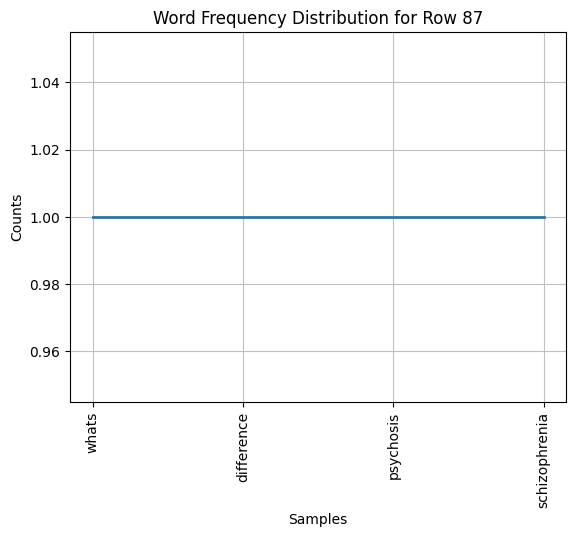

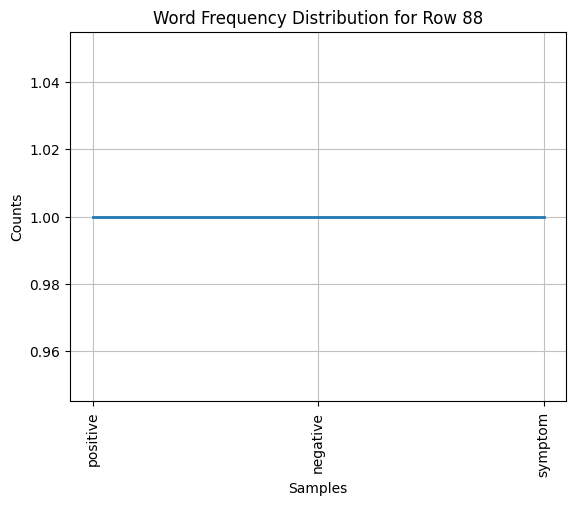

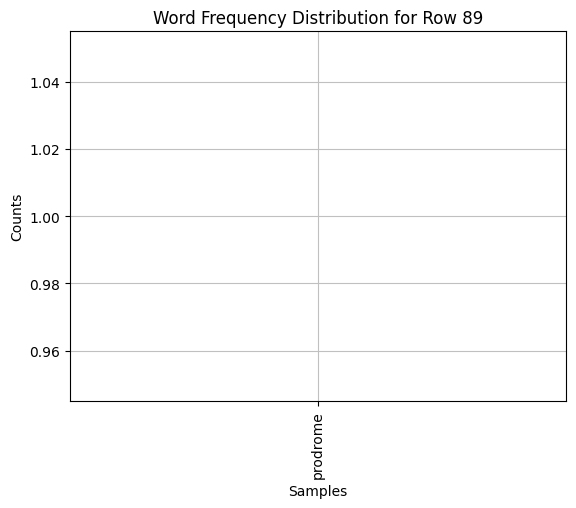

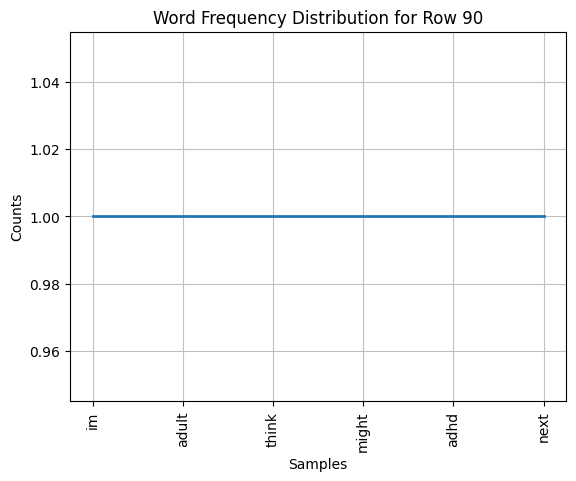

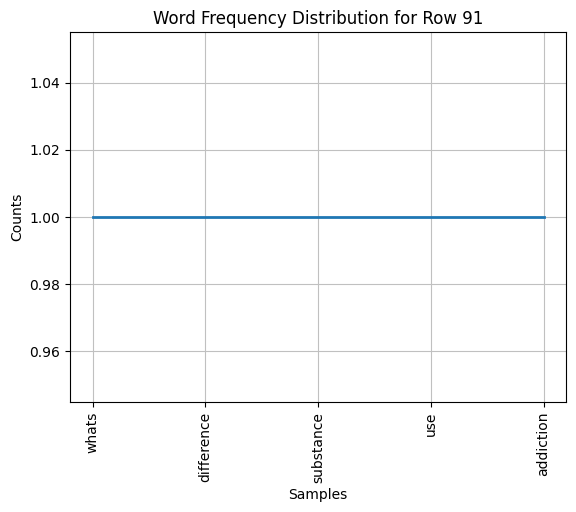

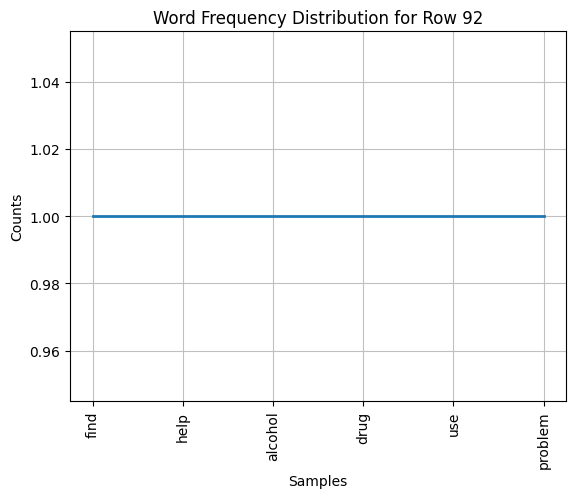

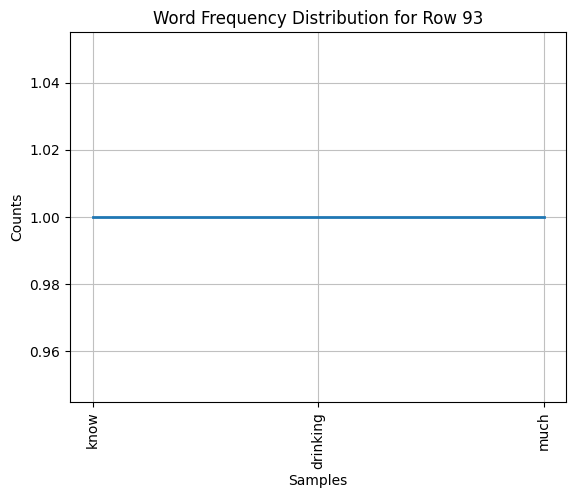

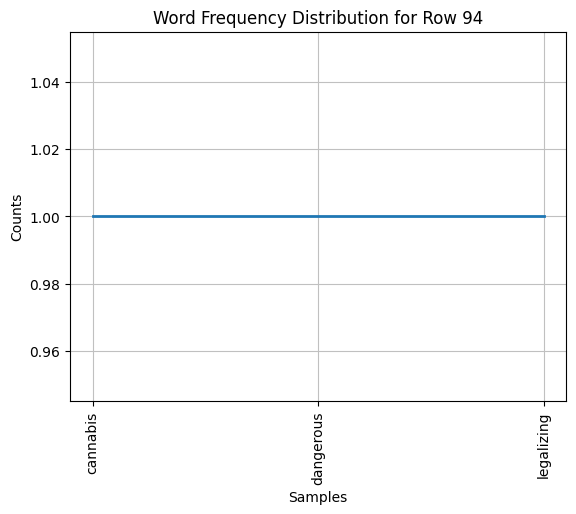

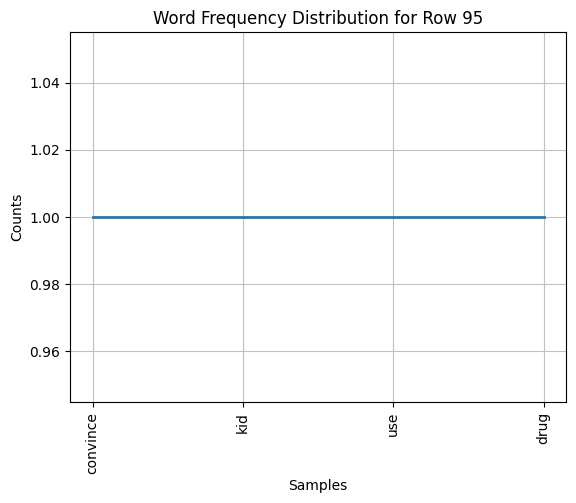

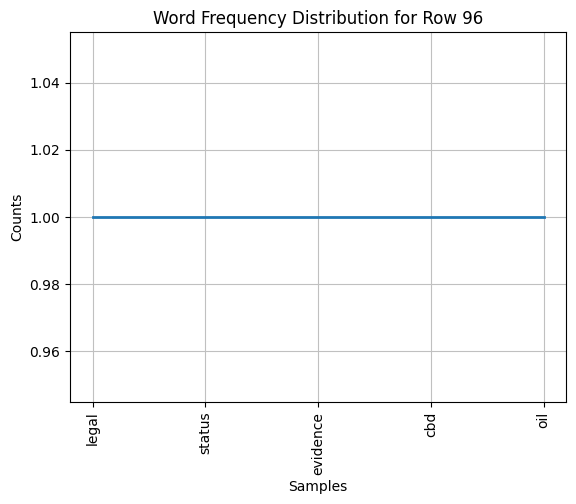

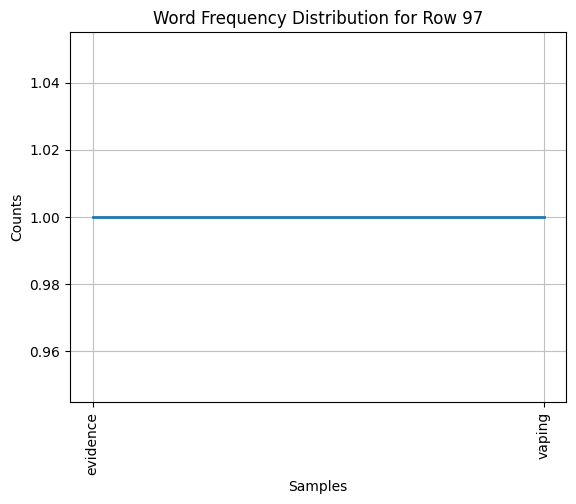

In [ ]:
# Plot the most common words of questions
plt.figure(figsize=(10, 5))
for index, row in df_quest.iterrows():
    freq_dist = row['word_frequencies']
    plt.title(f"Word Frequency Distribution for Row {index}")
    freq_dist.plot(10, cumulative=False)  # Plot the top 10 most common words

plt.show()

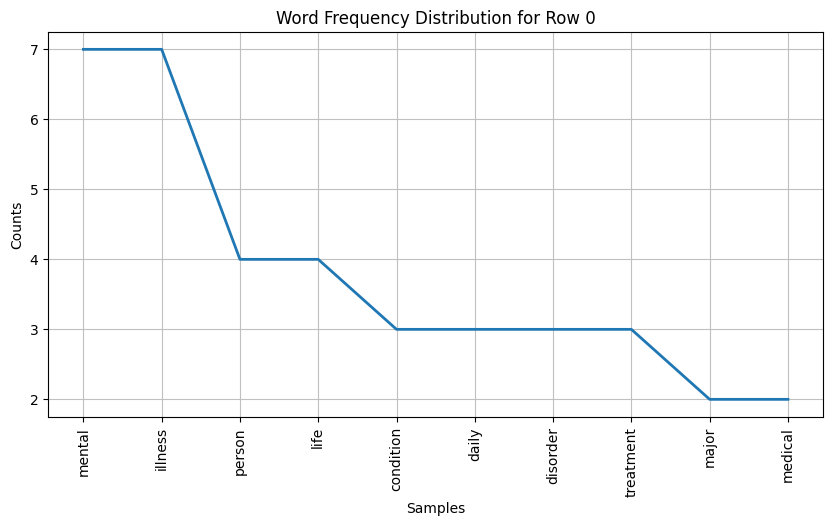

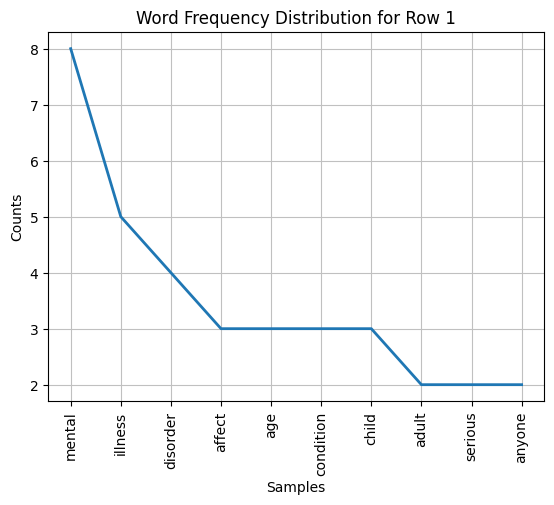

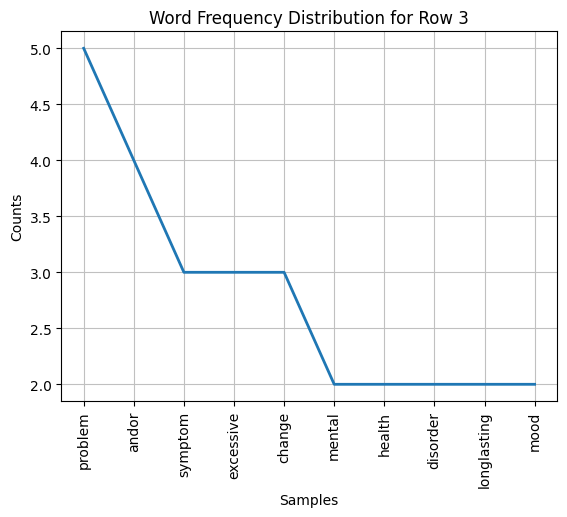

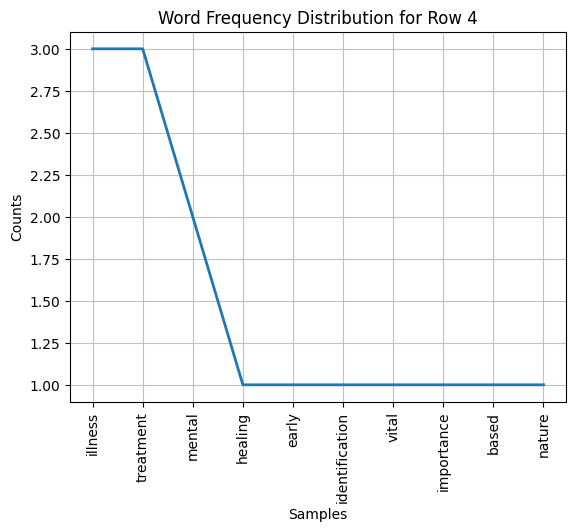

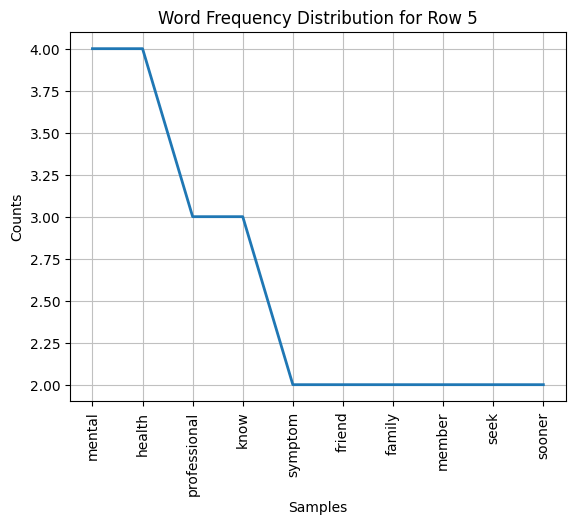

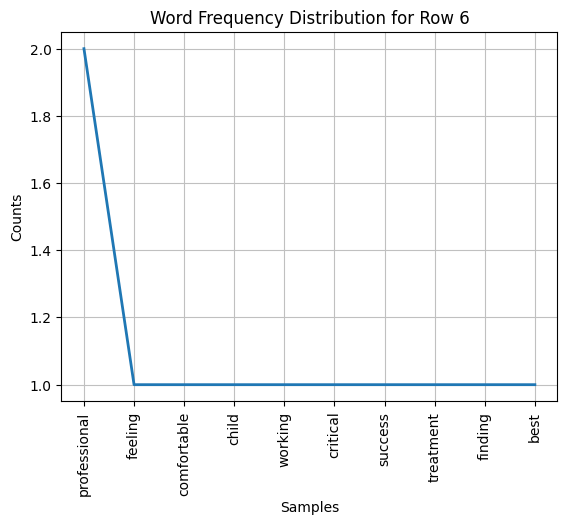

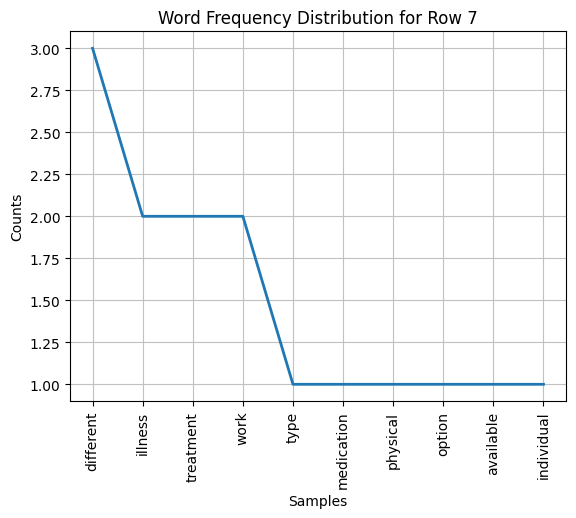

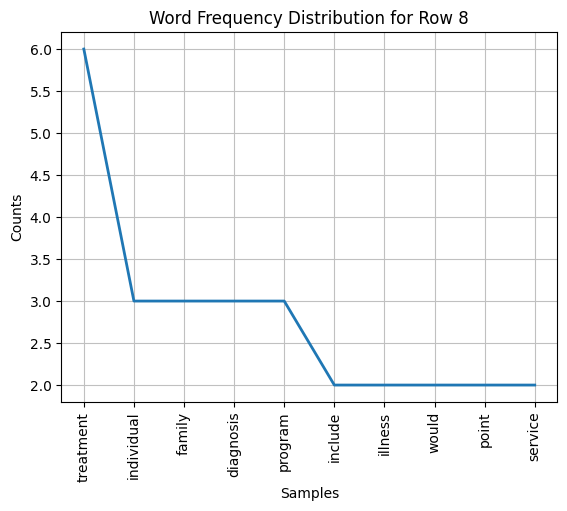

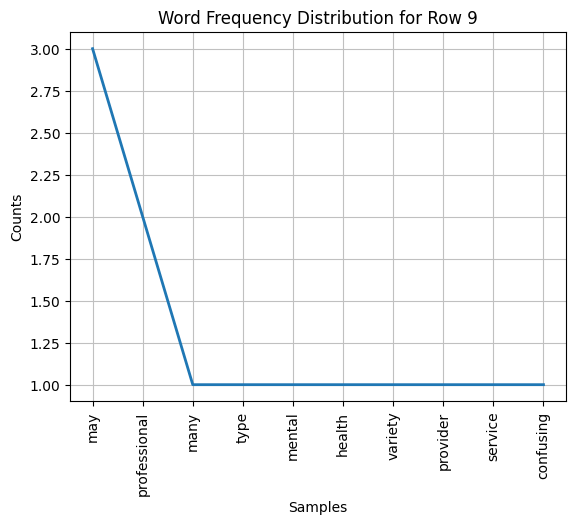

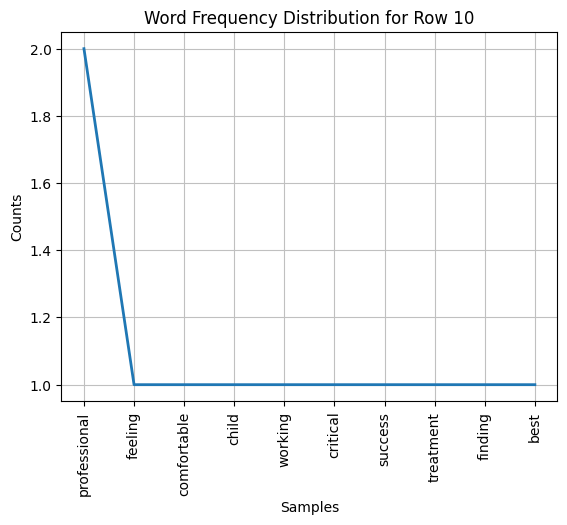

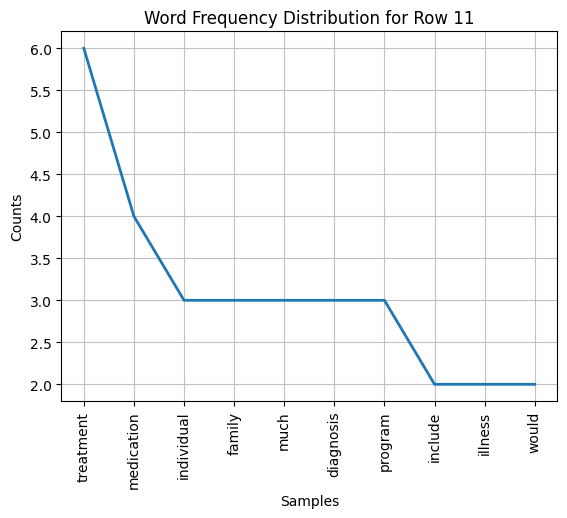

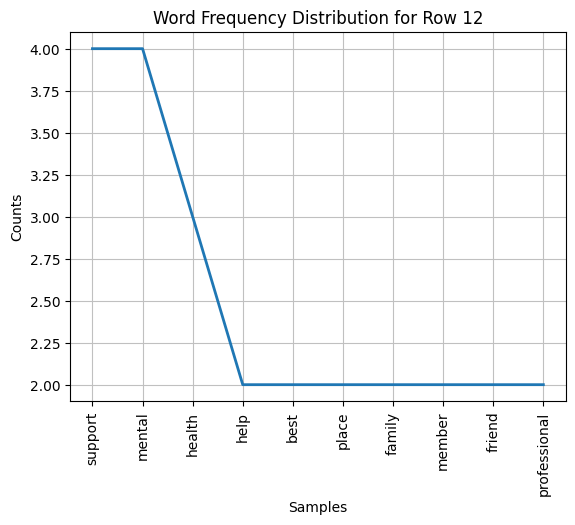

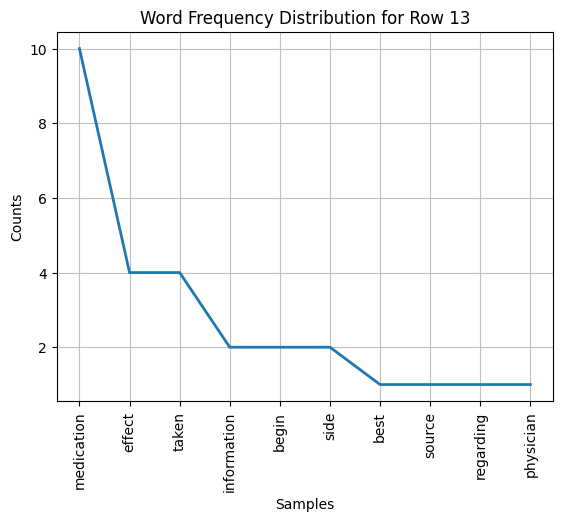

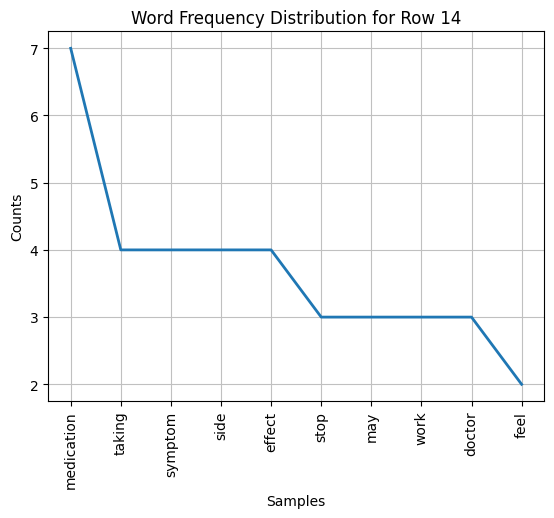

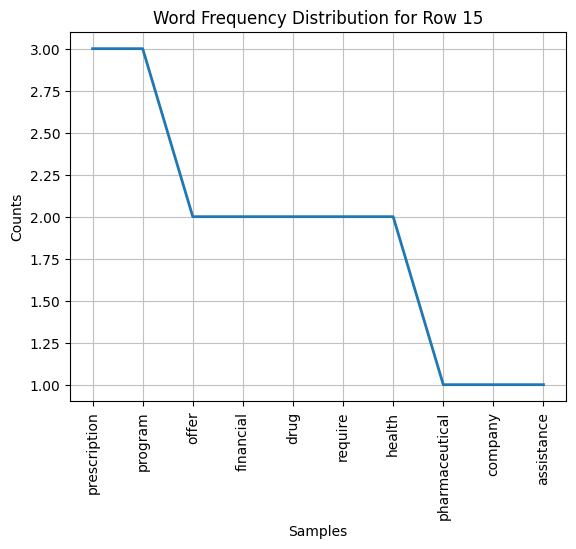

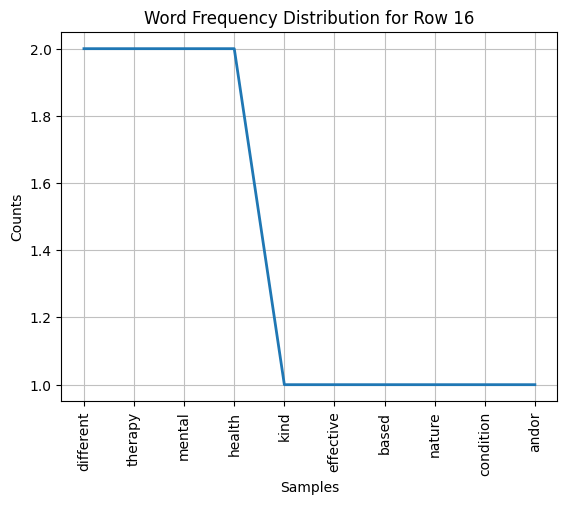

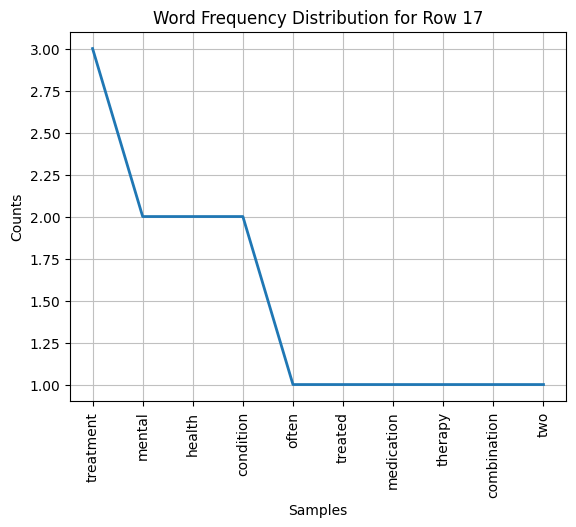

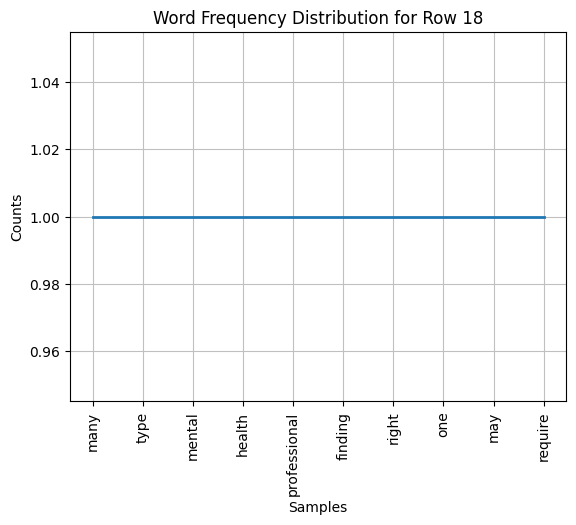

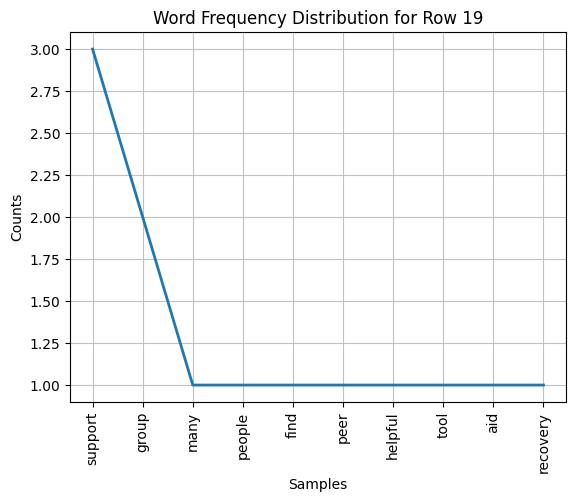

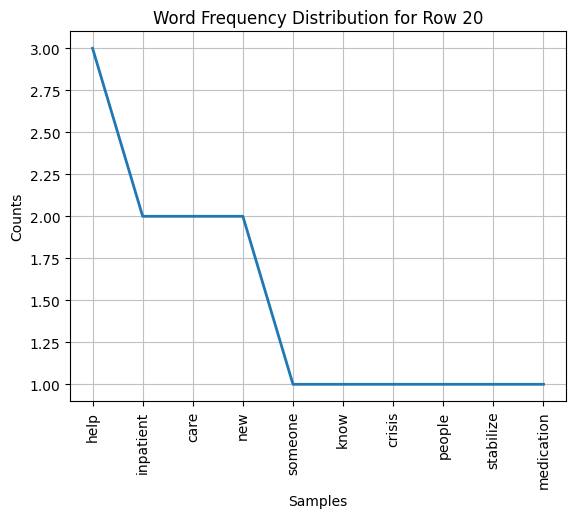

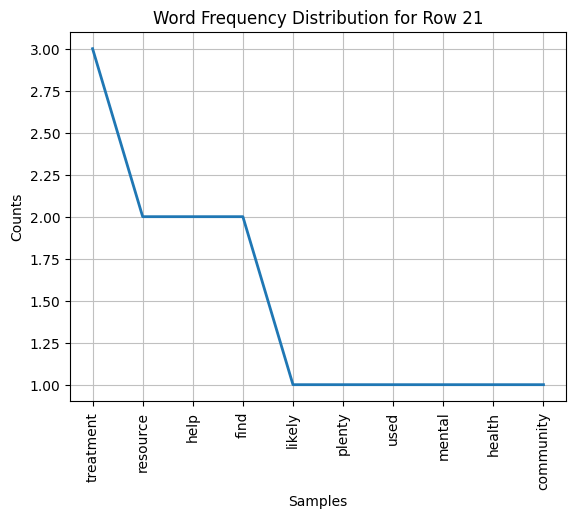

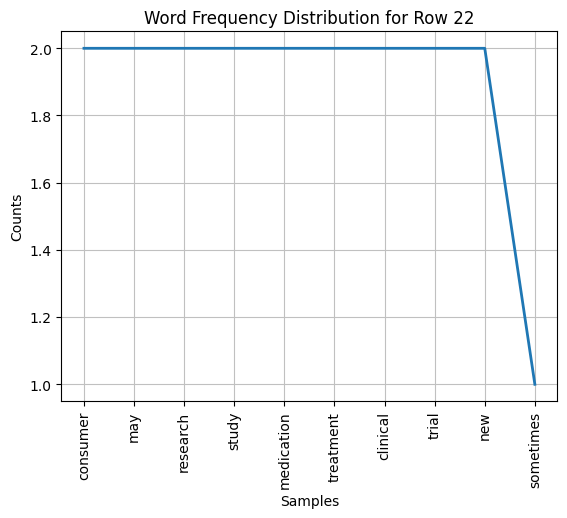

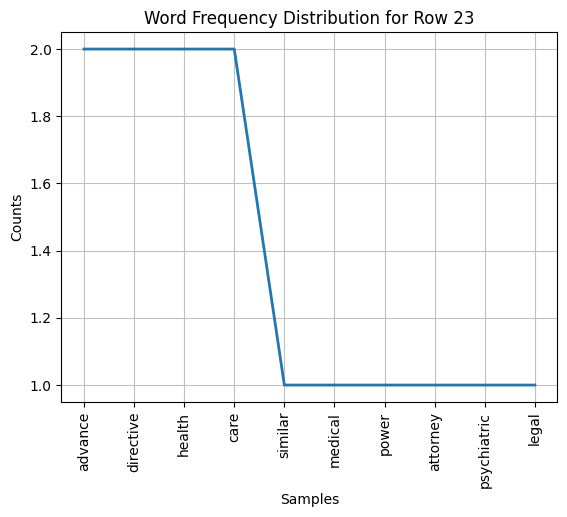

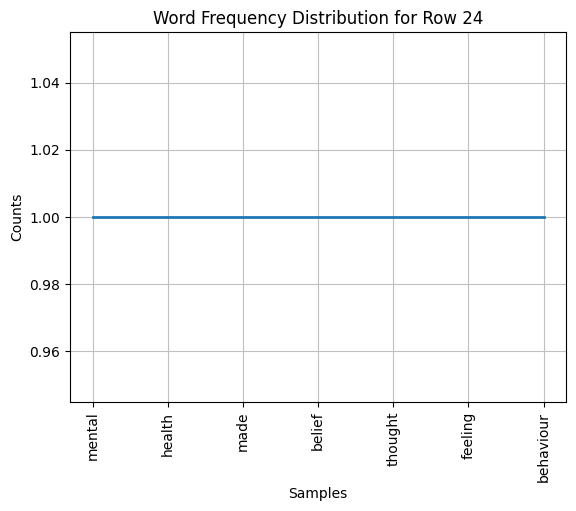

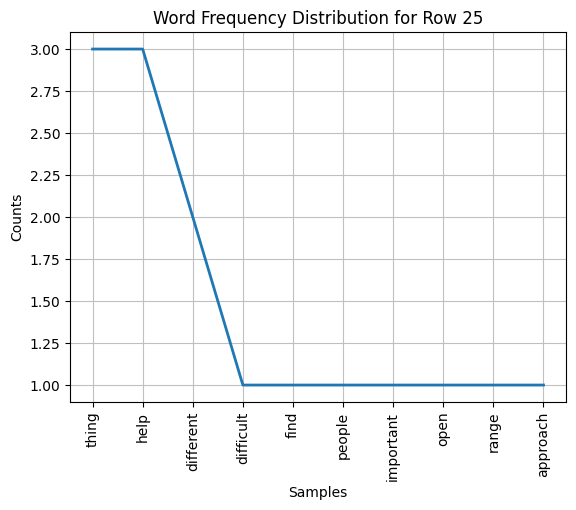

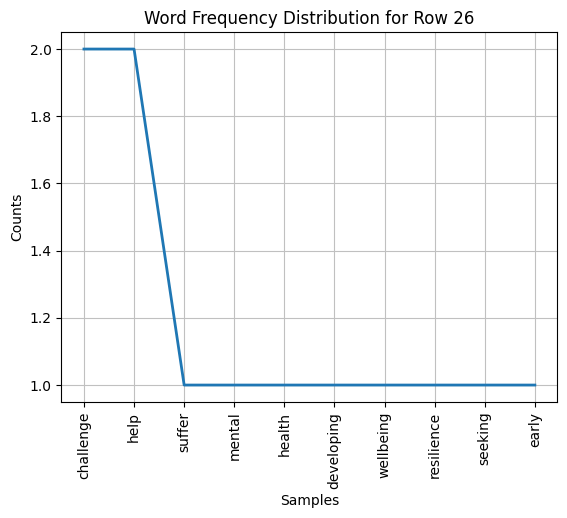

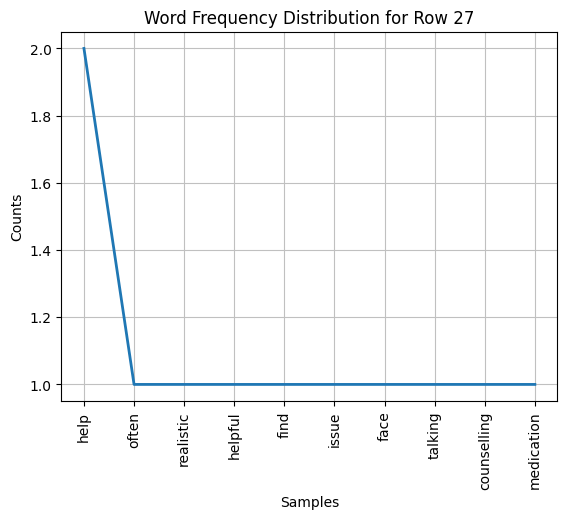

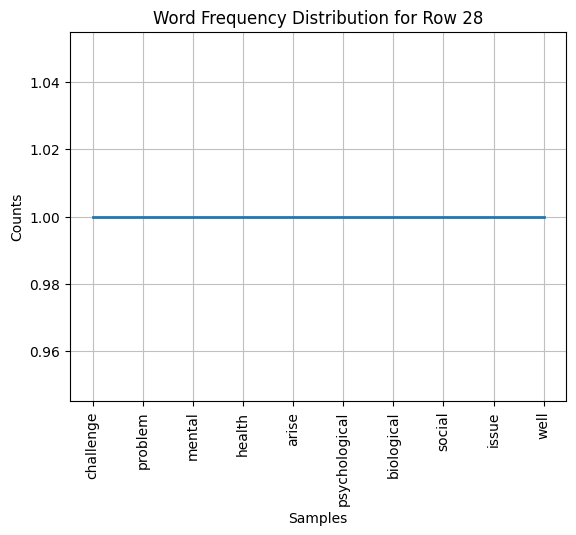

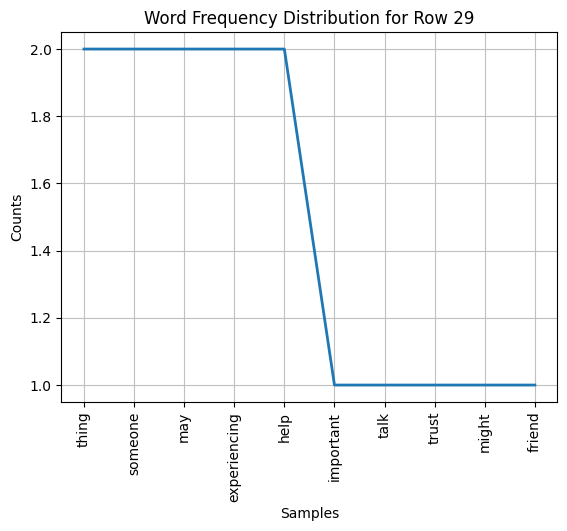

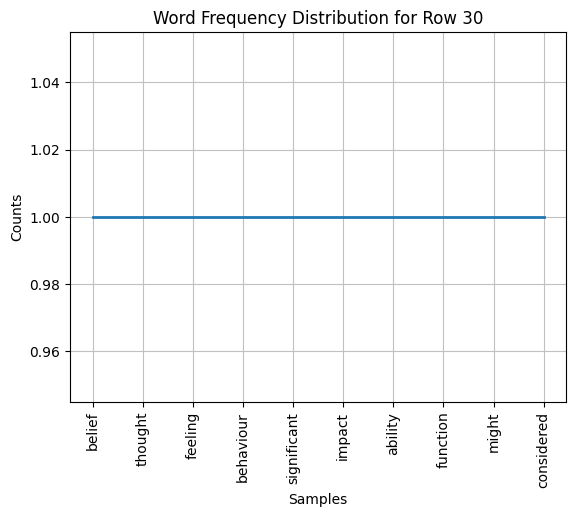

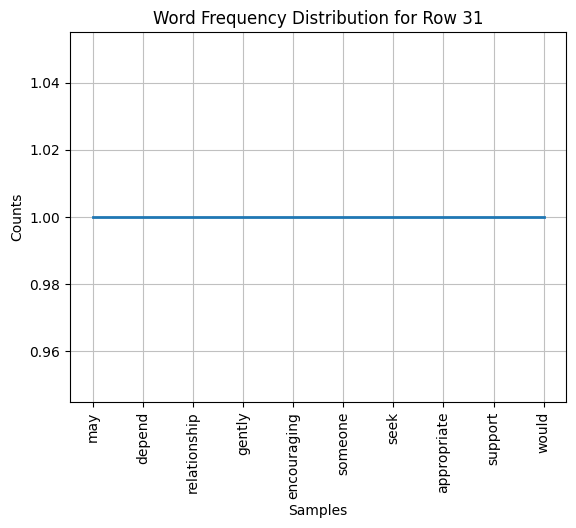

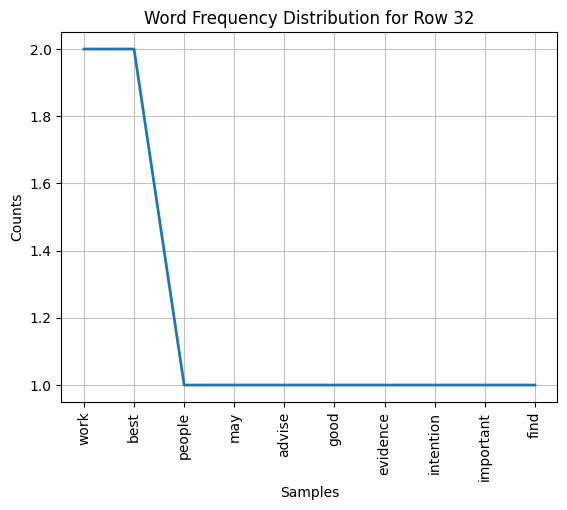

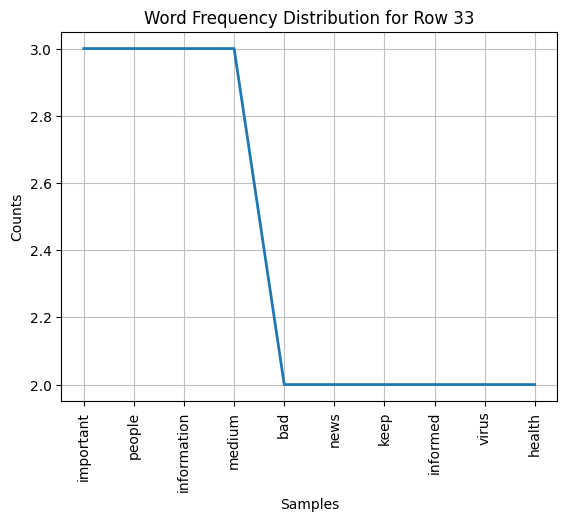

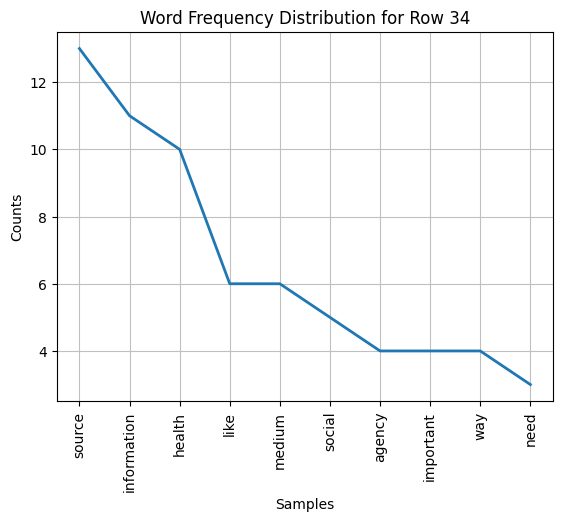

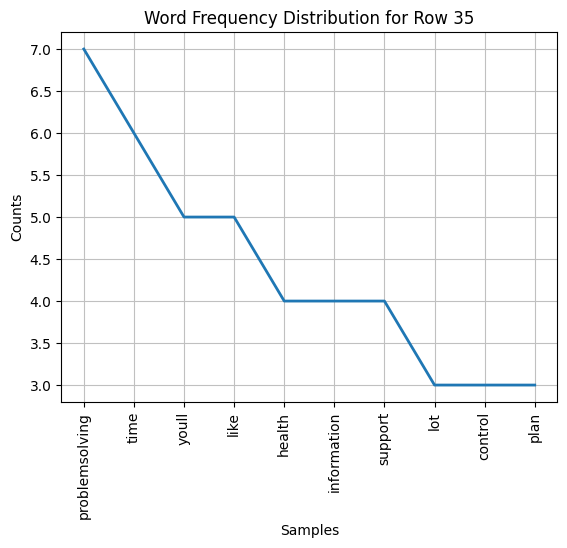

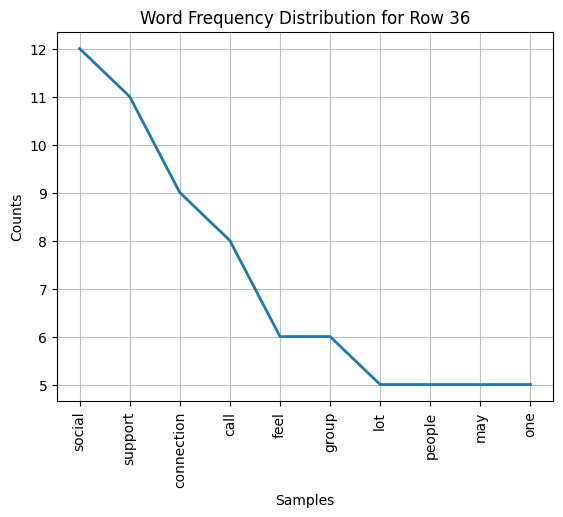

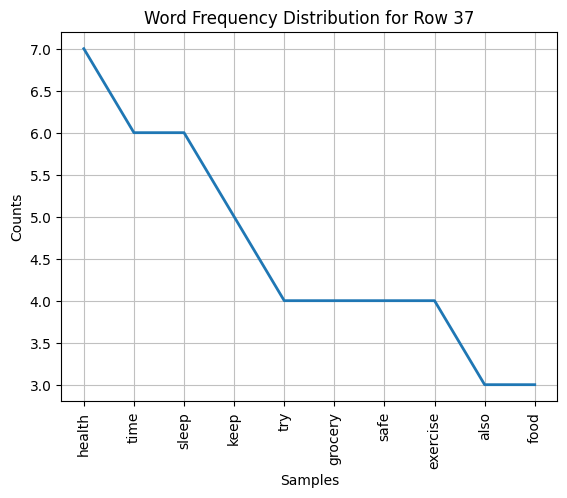

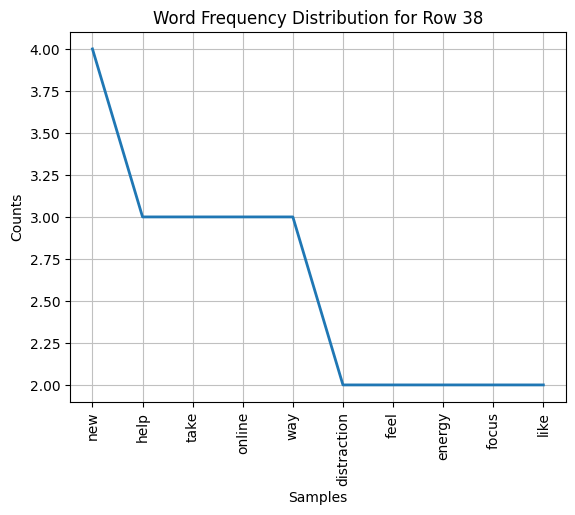

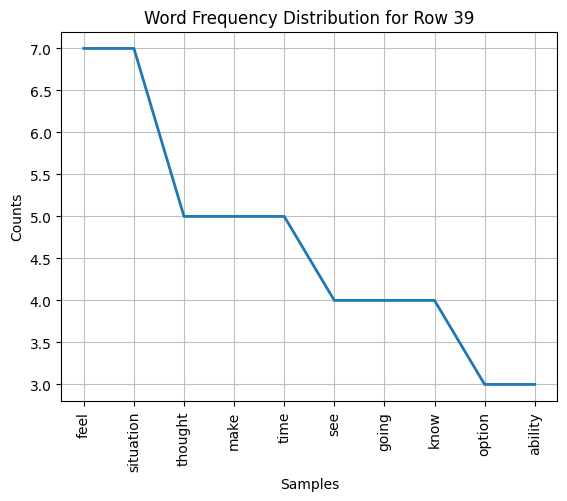

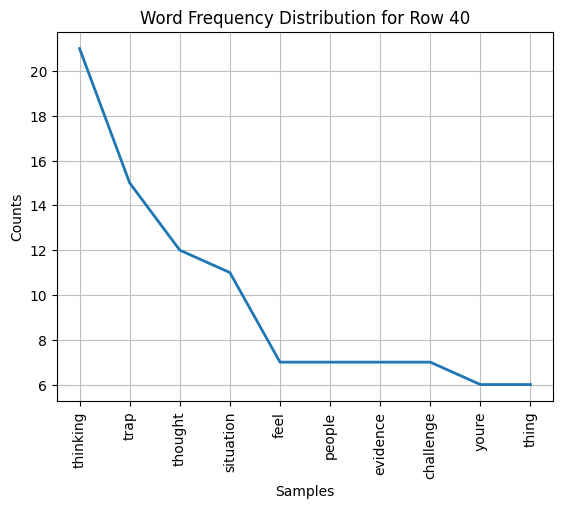

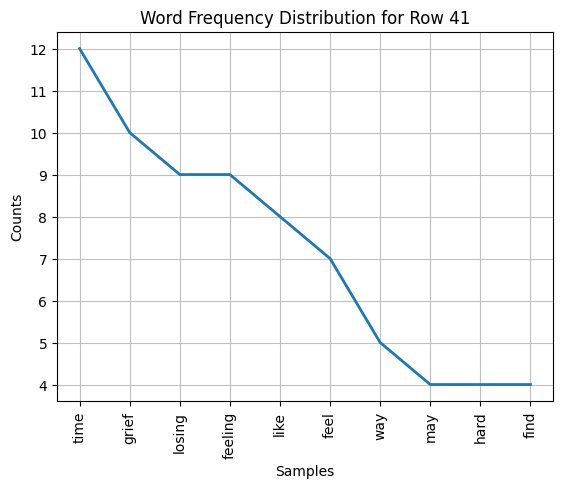

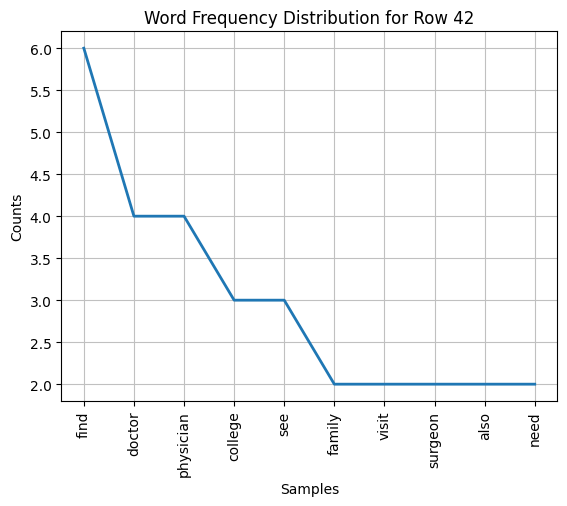

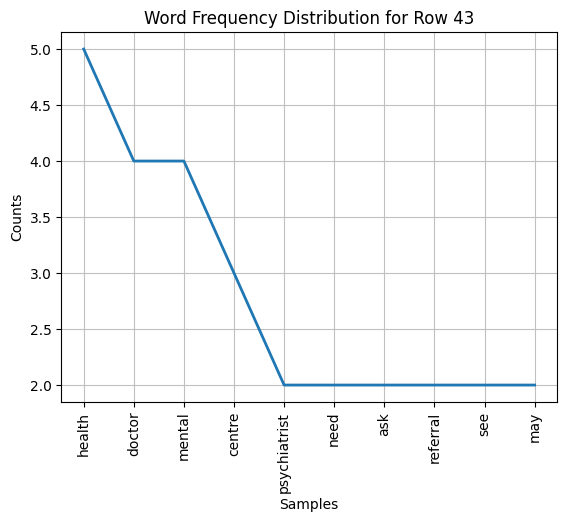

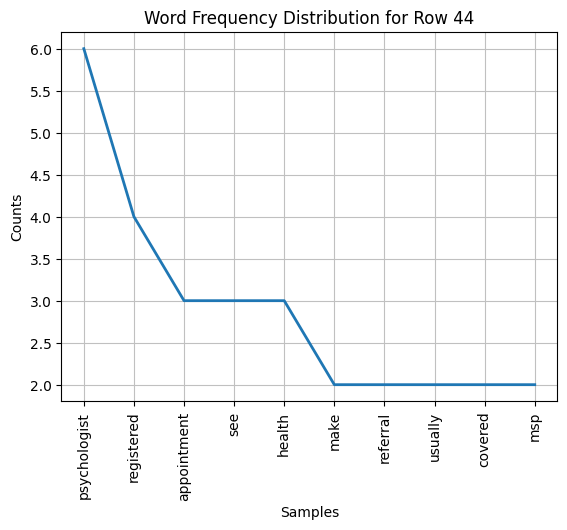

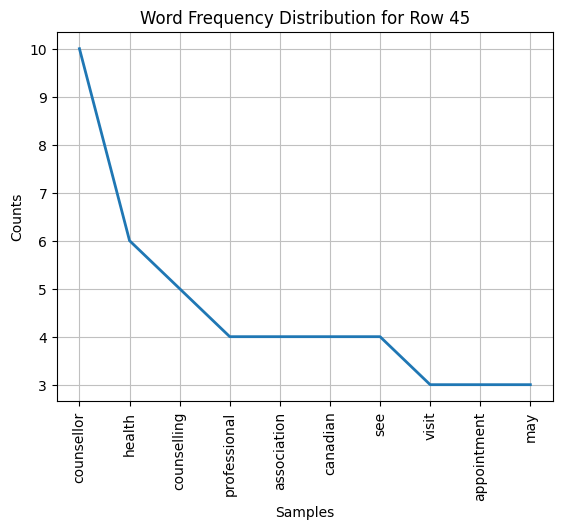

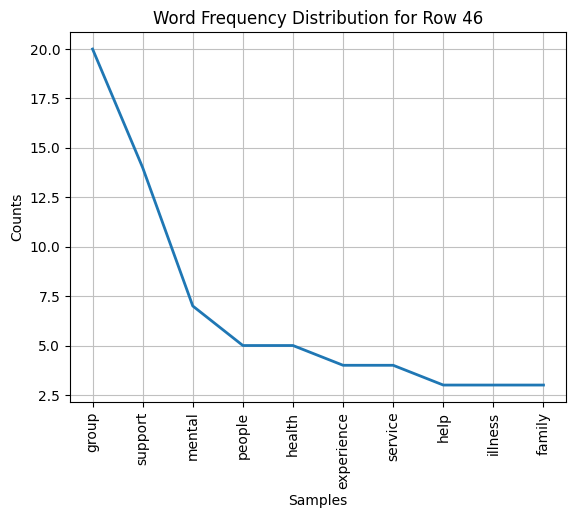

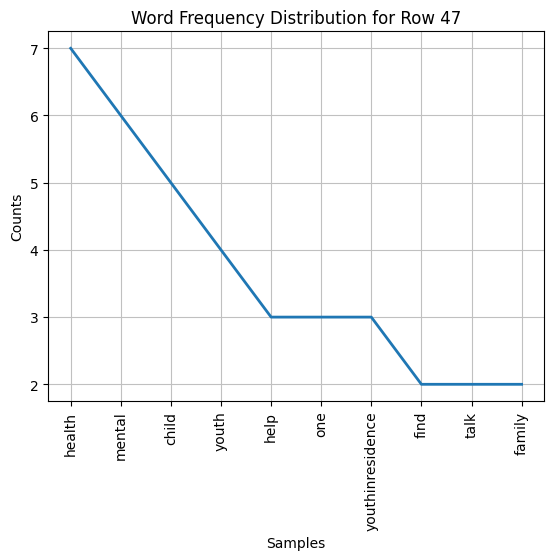

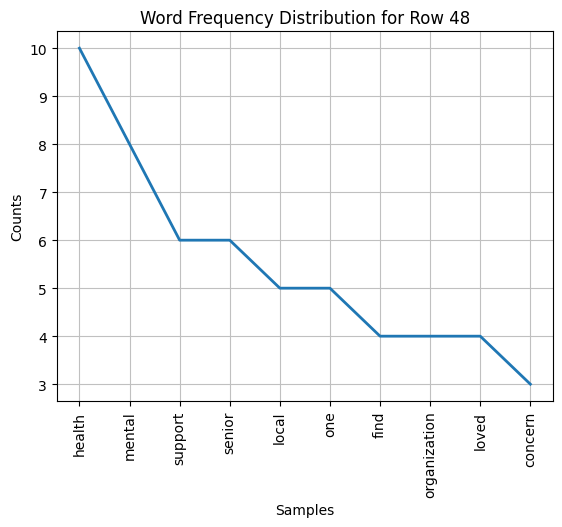

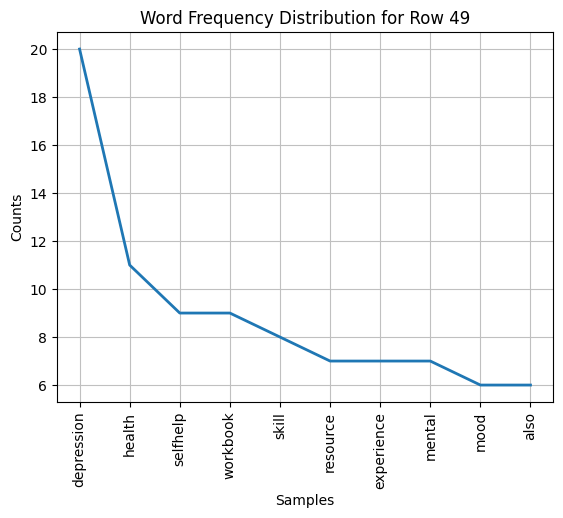

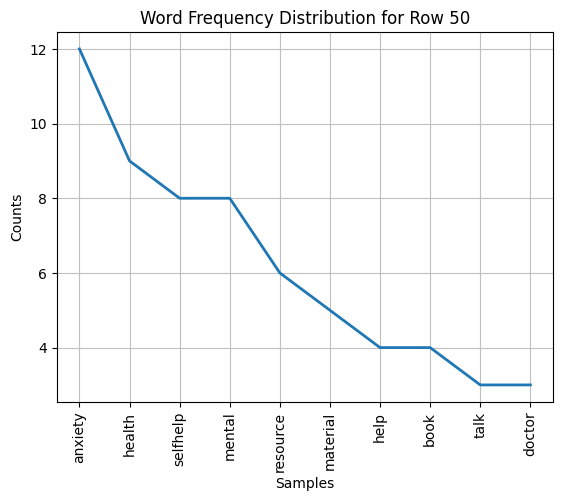

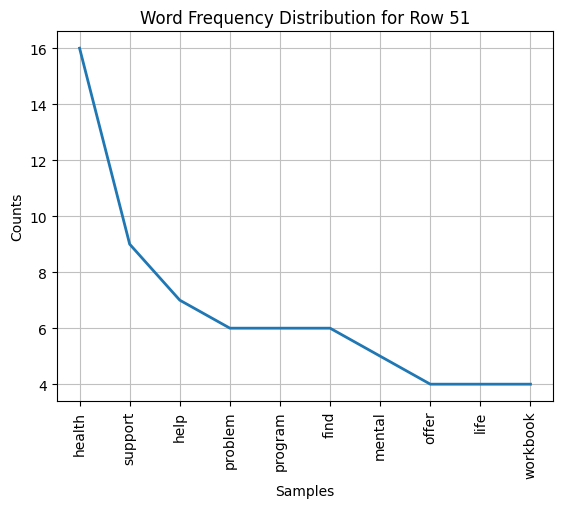

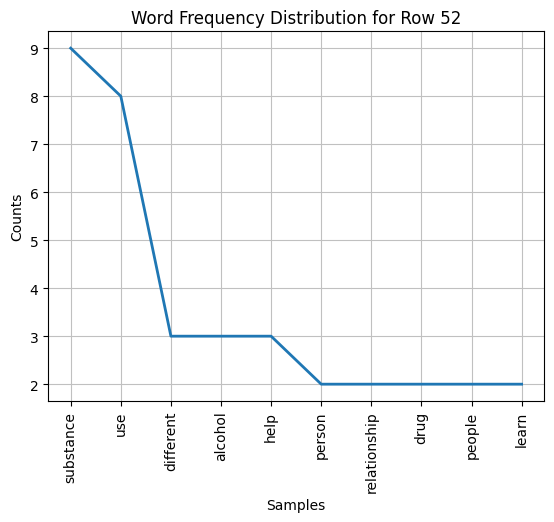

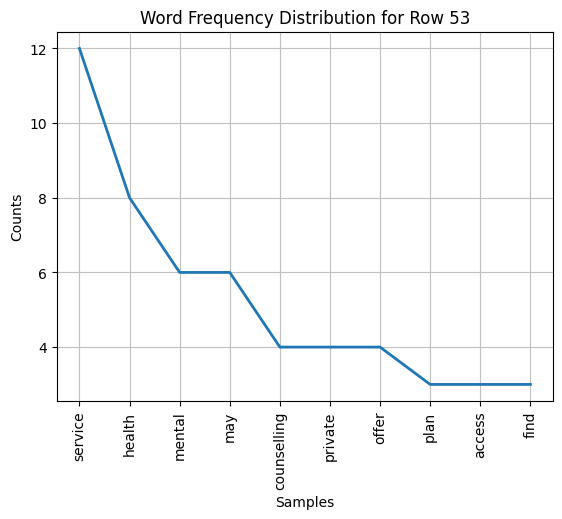

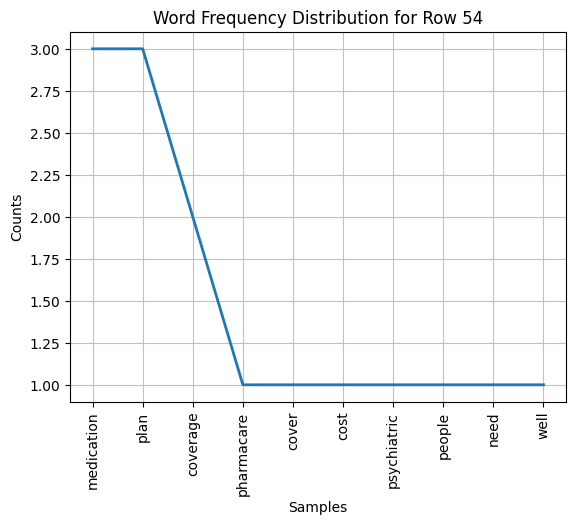

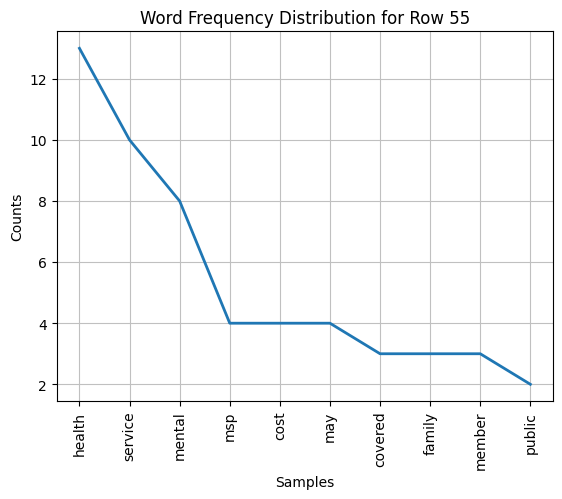

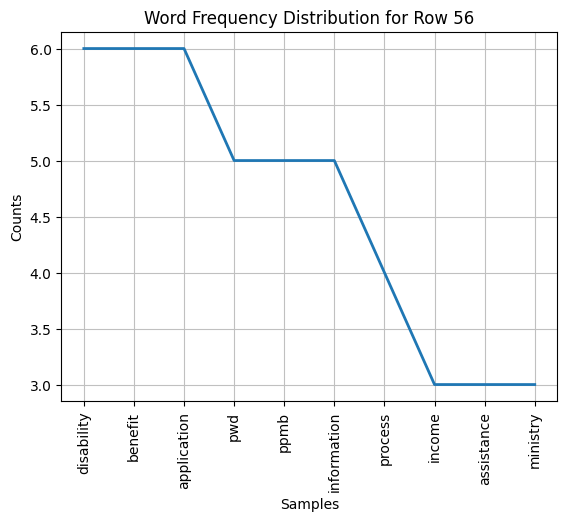

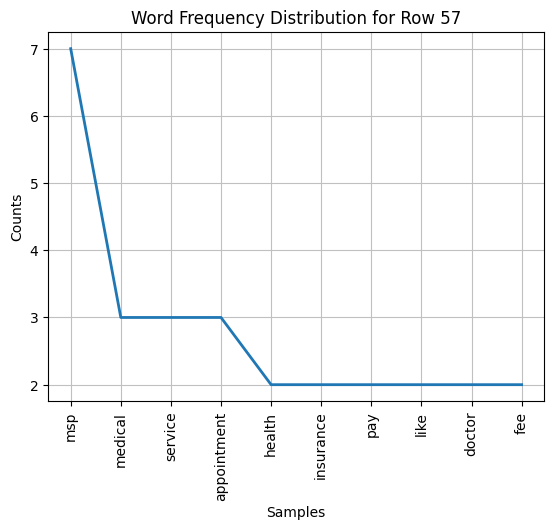

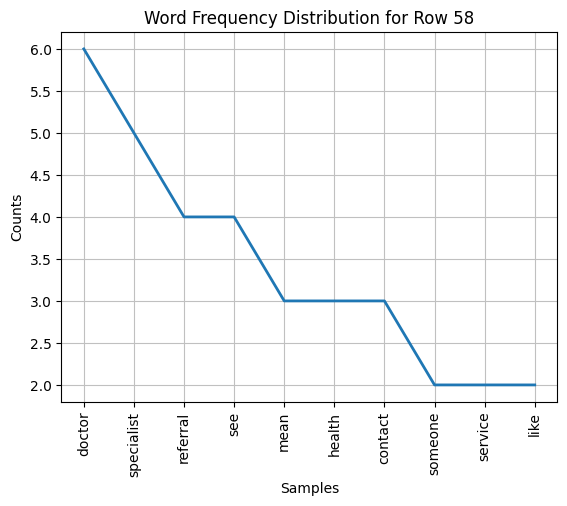

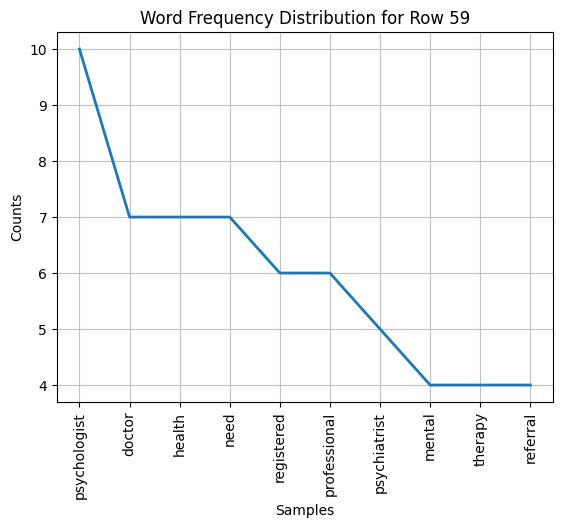

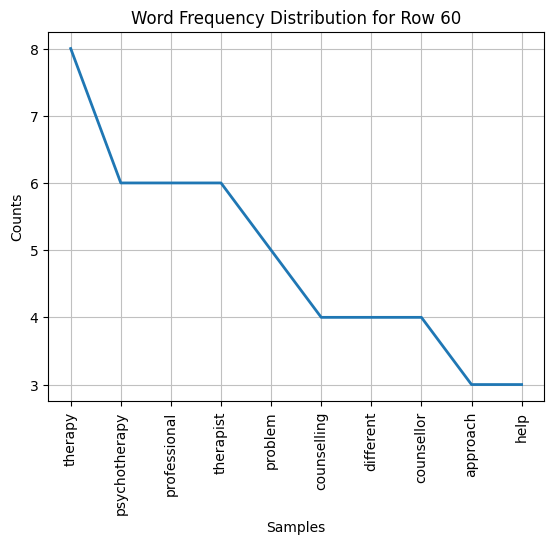

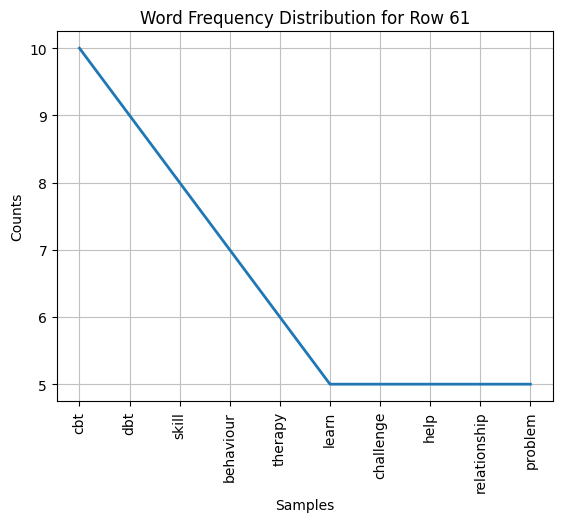

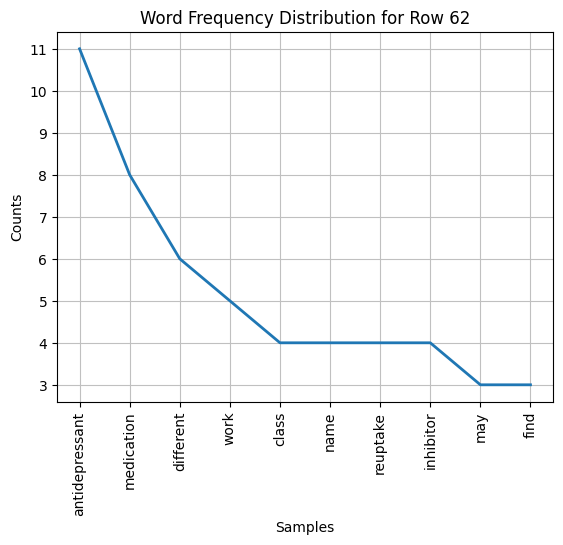

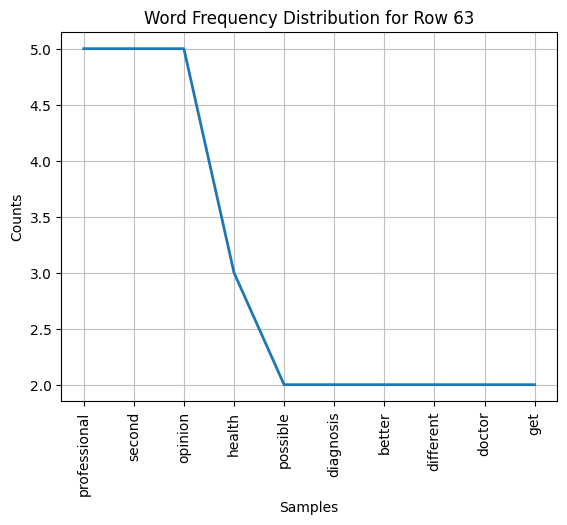

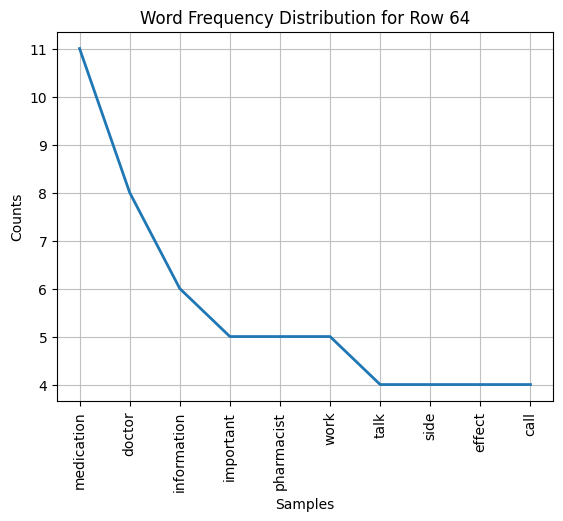

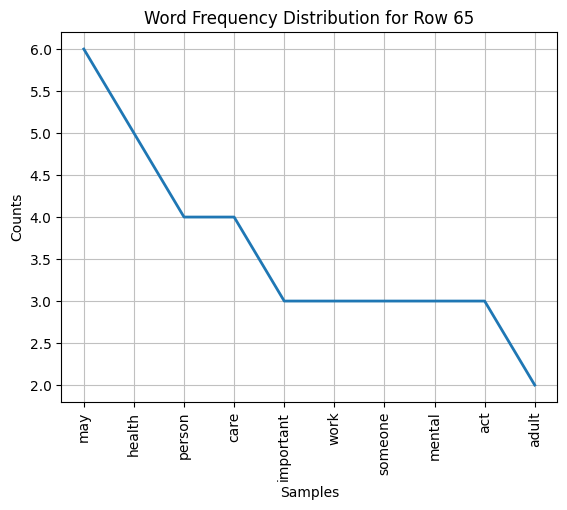

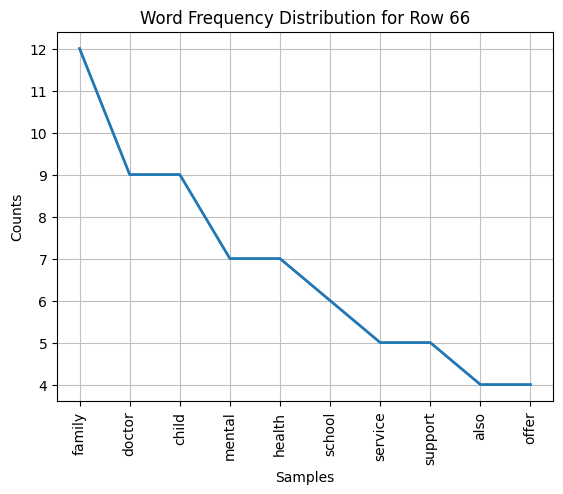

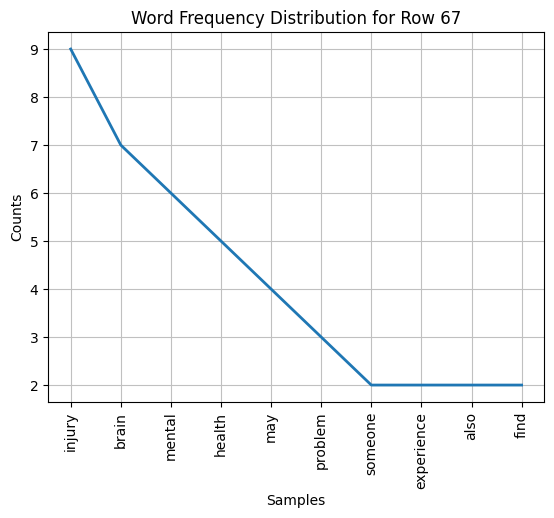

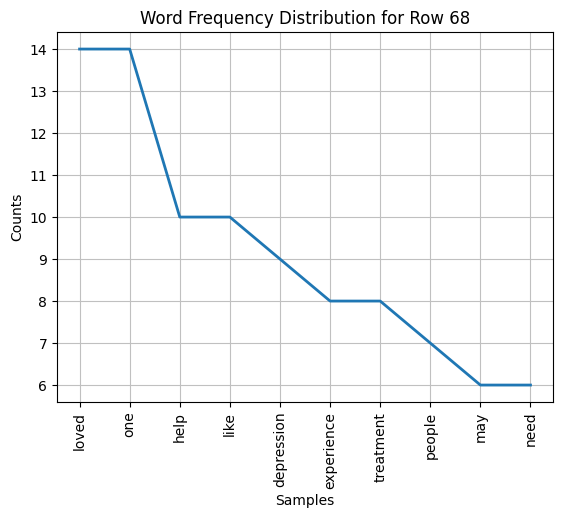

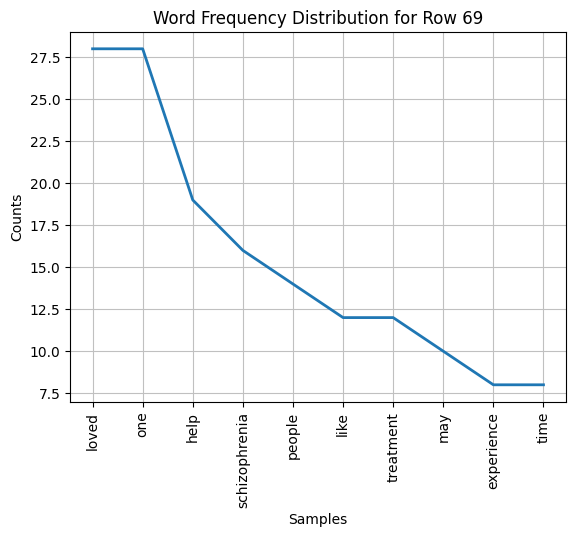

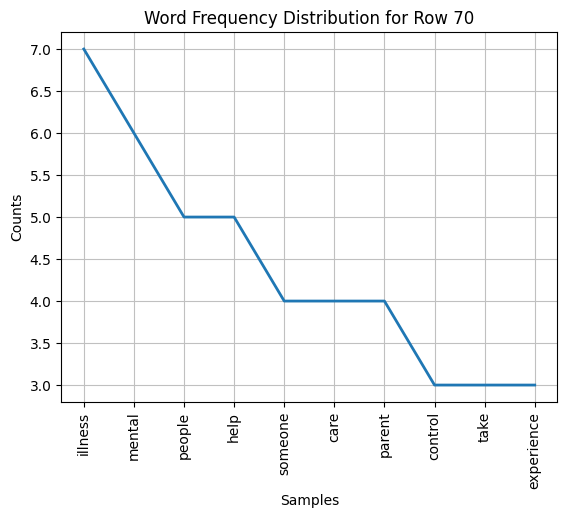

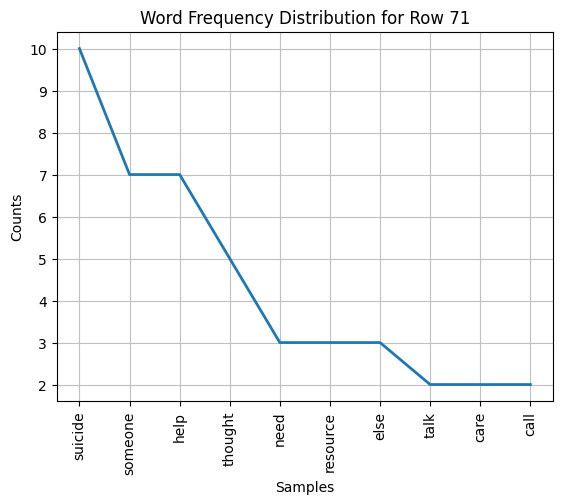

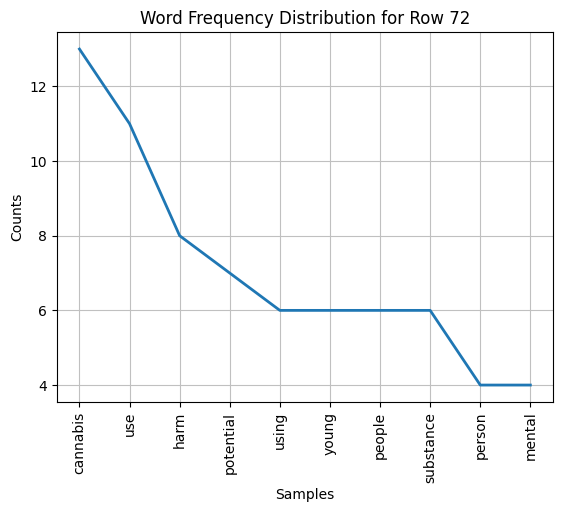

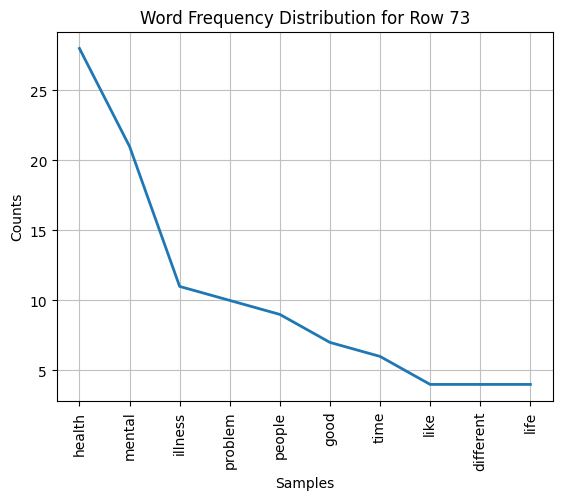

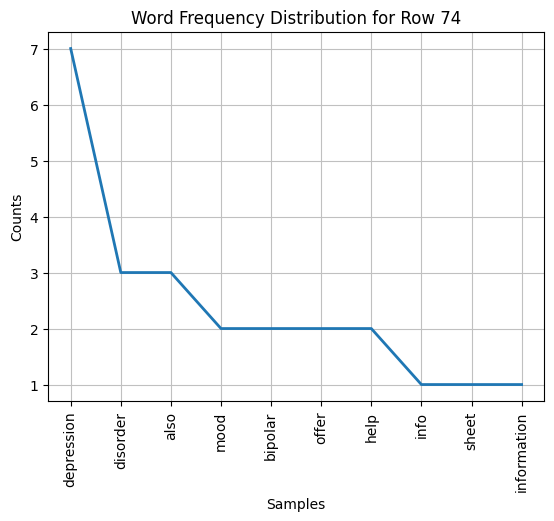

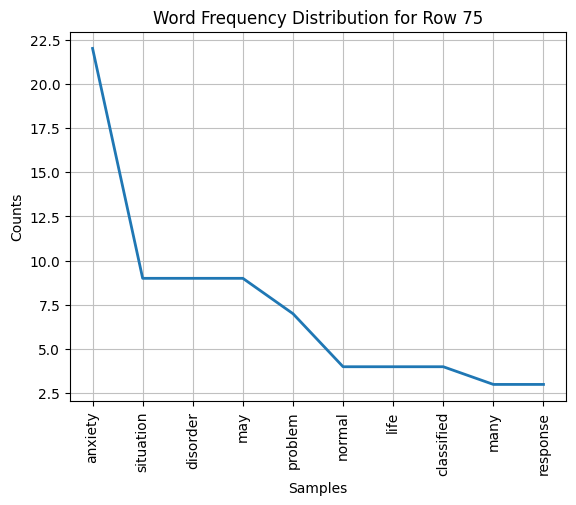

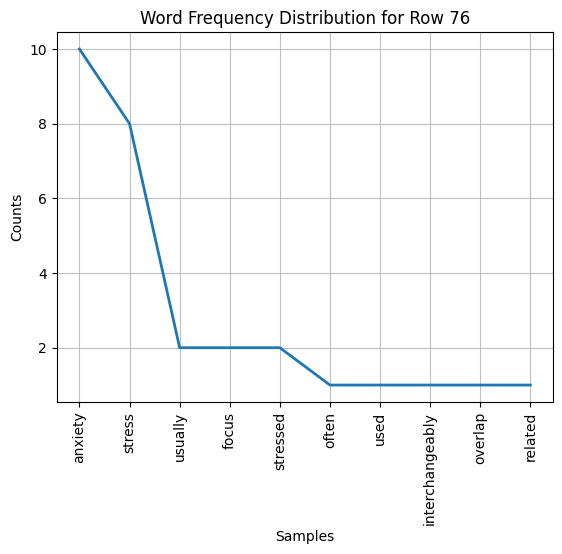

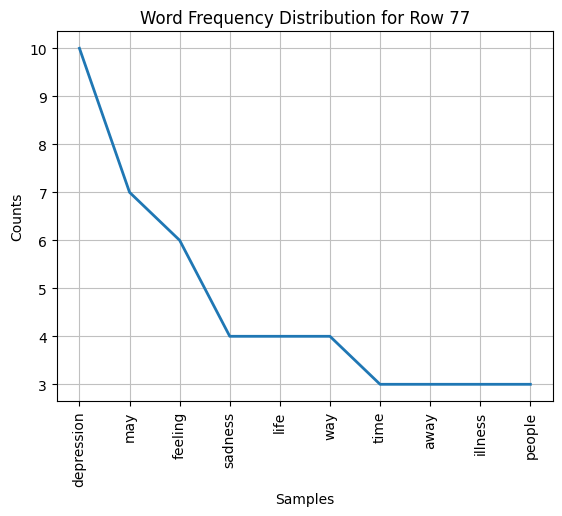

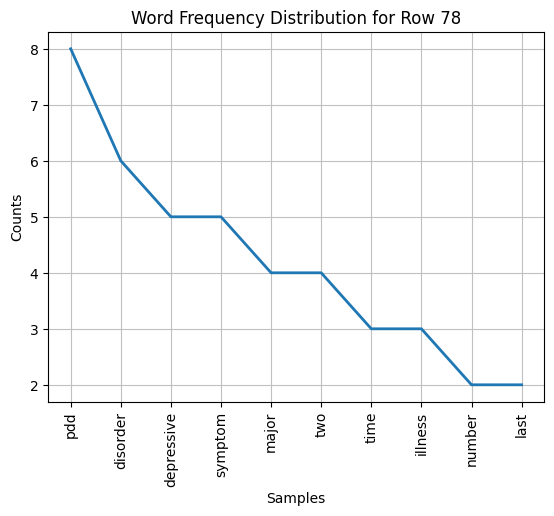

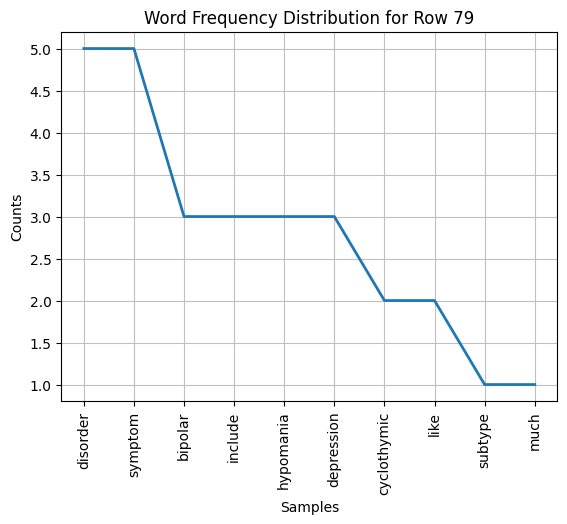

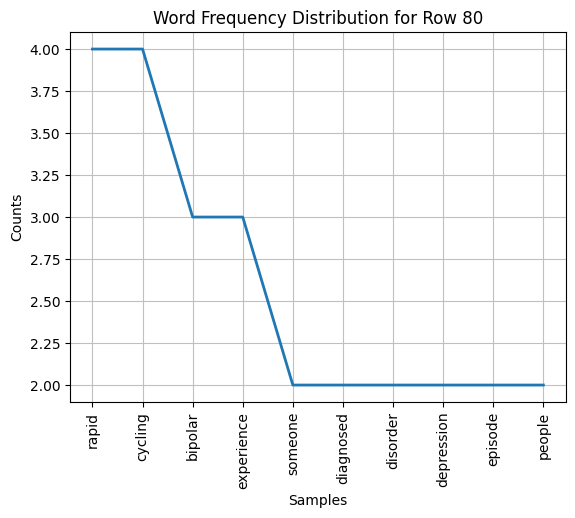

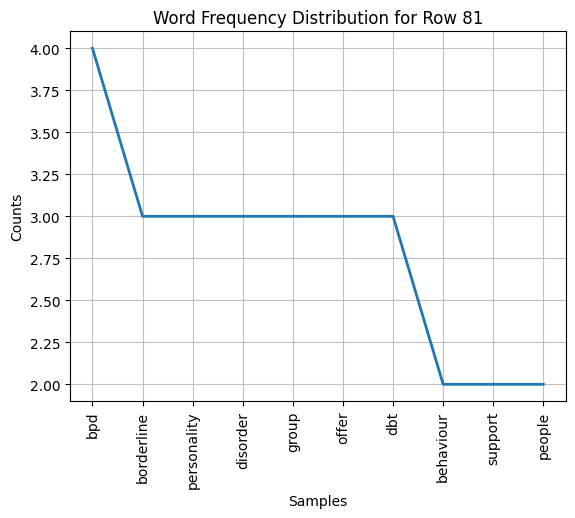

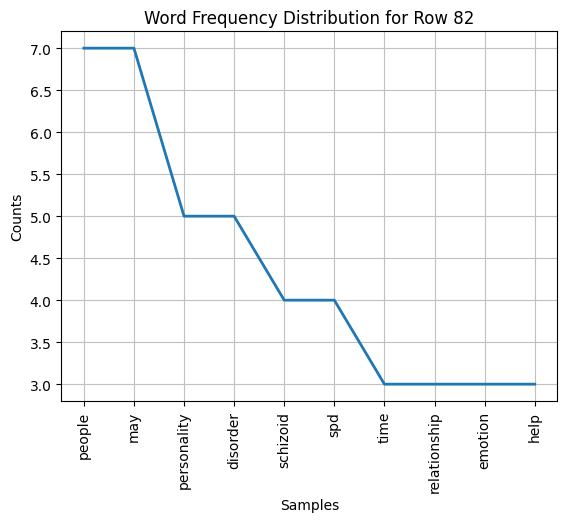

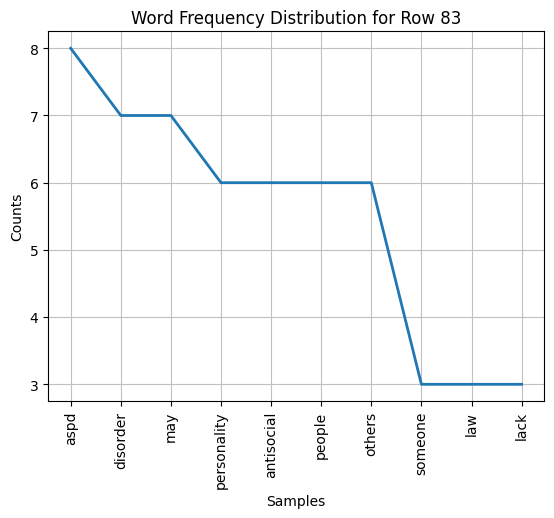

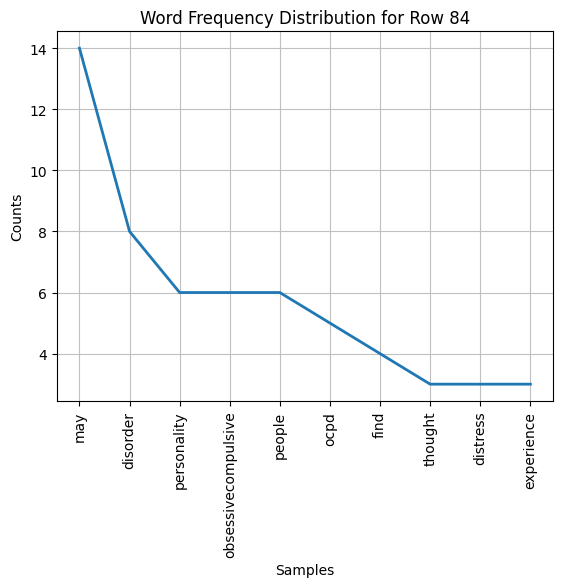

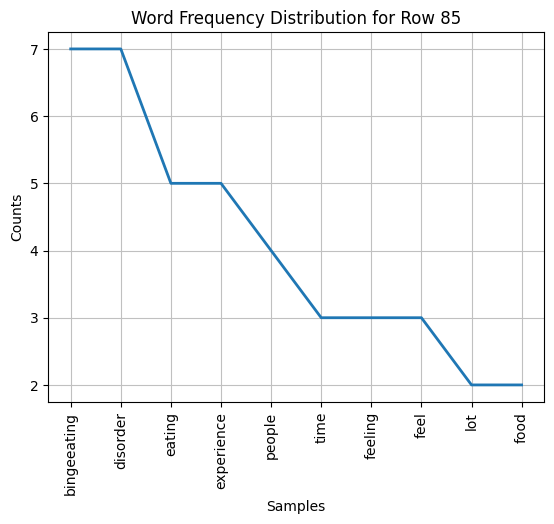

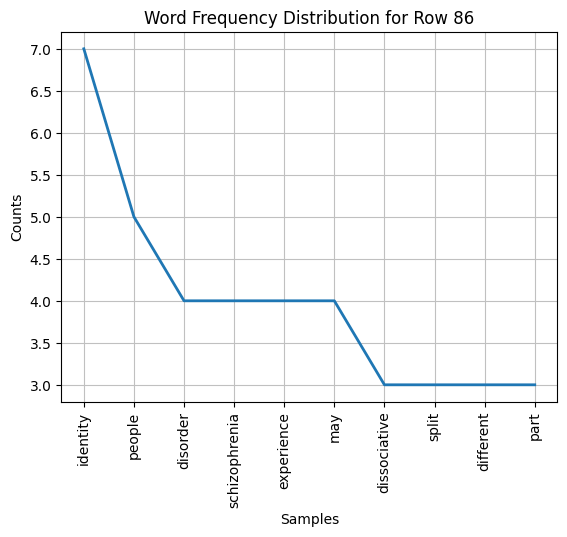

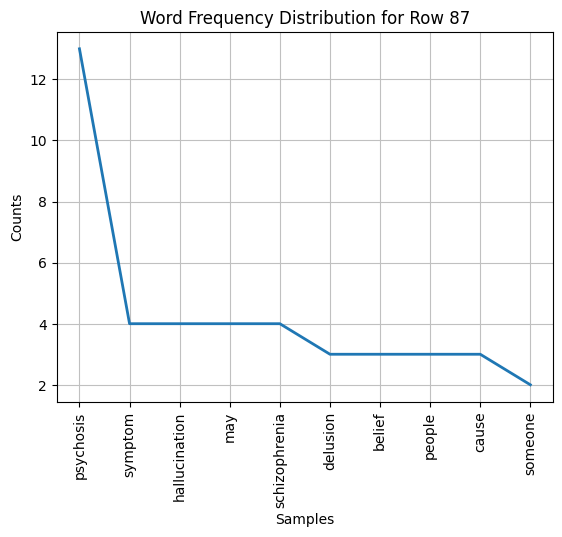

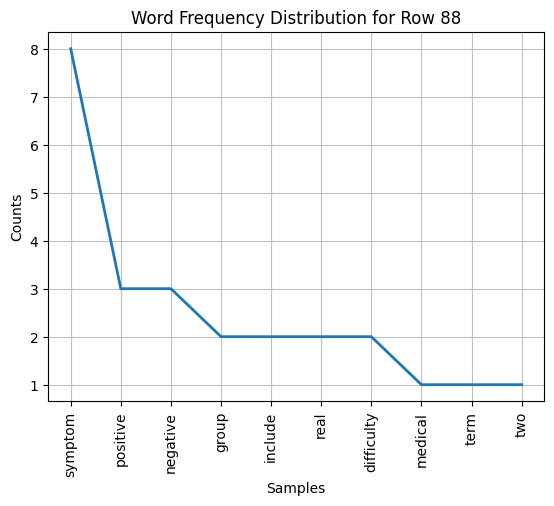

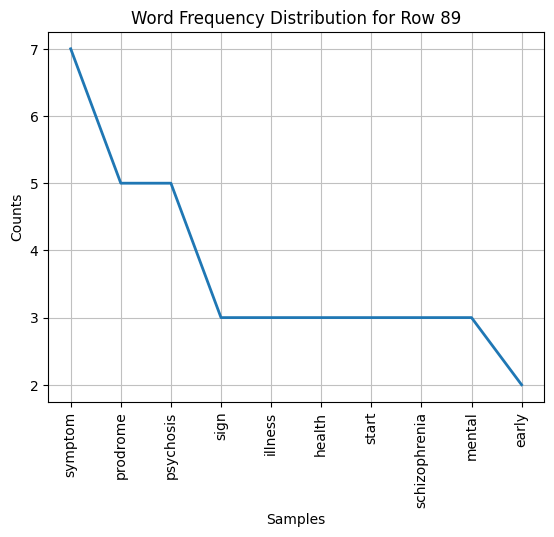

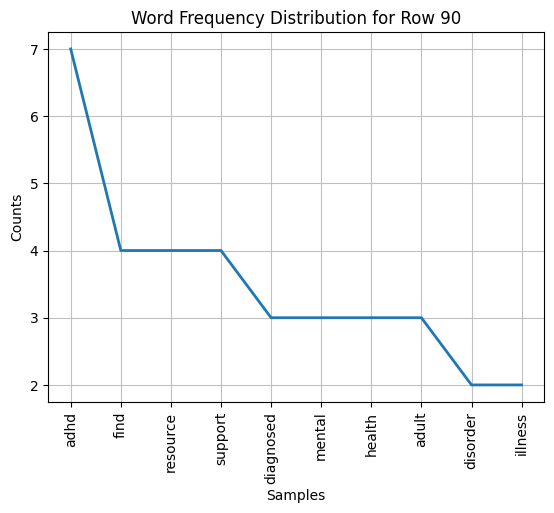

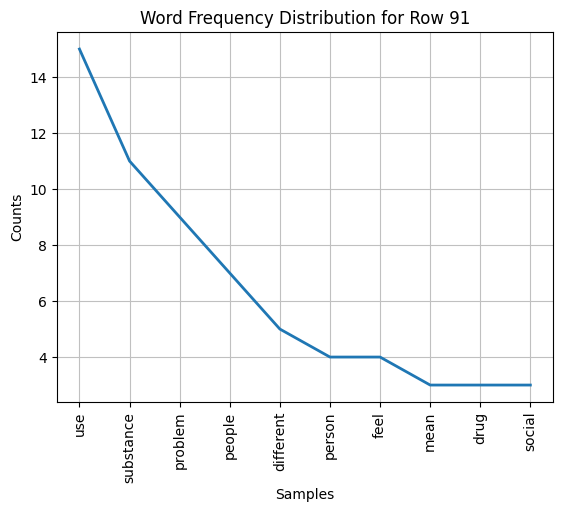

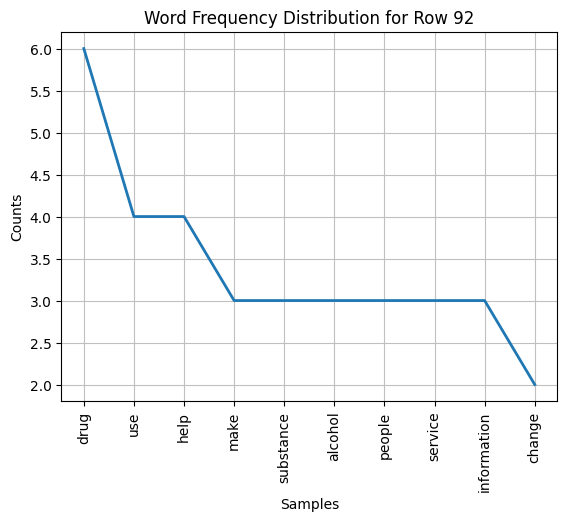

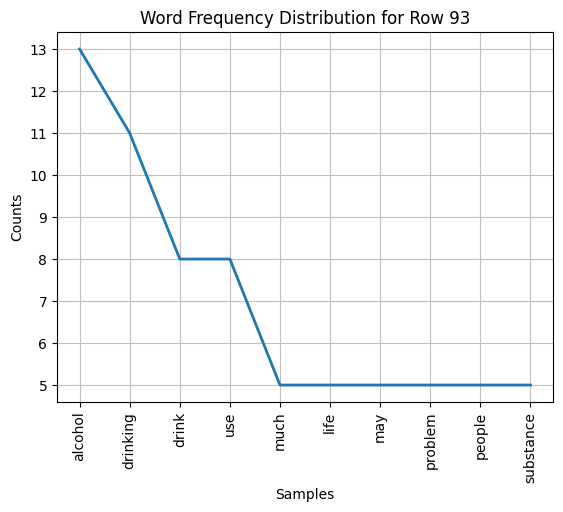

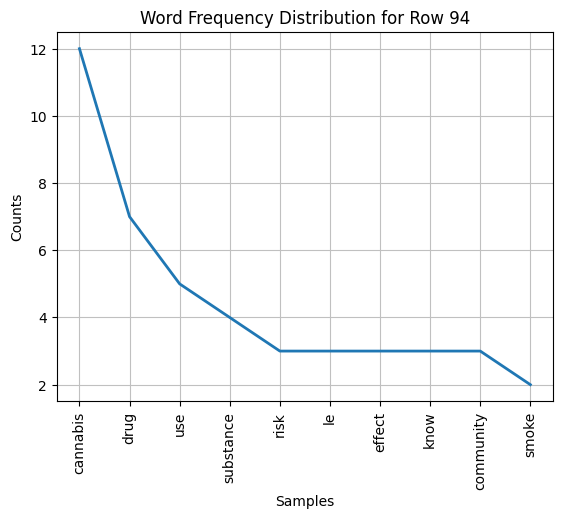

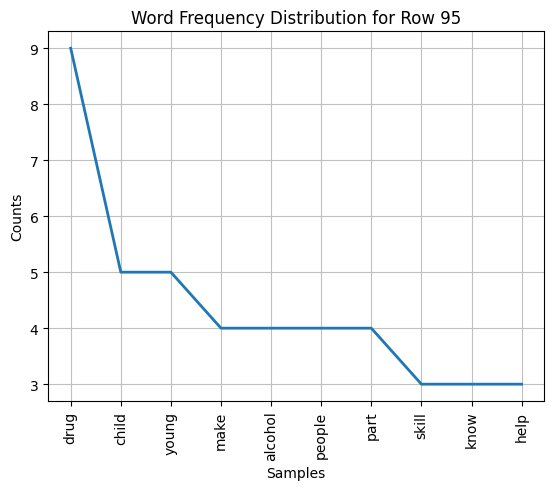

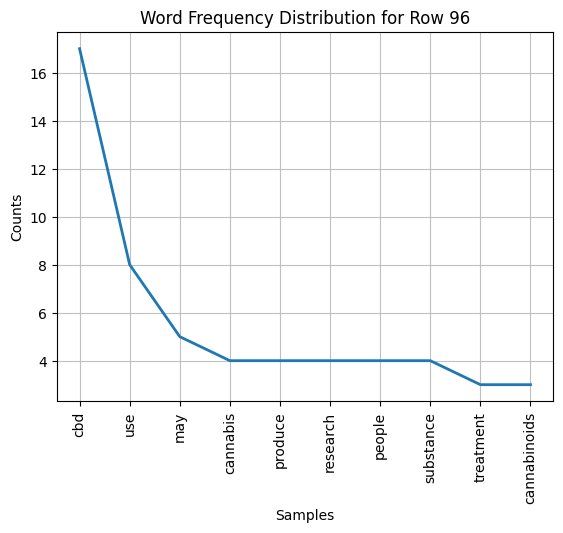

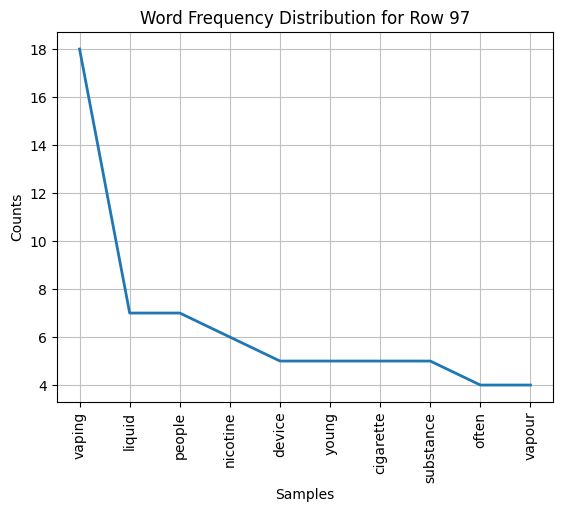

In [ ]:
# Plot the most common words
plt.figure(figsize=(10, 5))
for index, row in df_answ.iterrows():
    freq_dist = row['word_frequencies']
    plt.title(f"Word Frequency Distribution for Row {index}")
    freq_dist.plot(10, cumulative=False)  # Plot the top 10 most common words

plt.show()

##Word Cloud

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

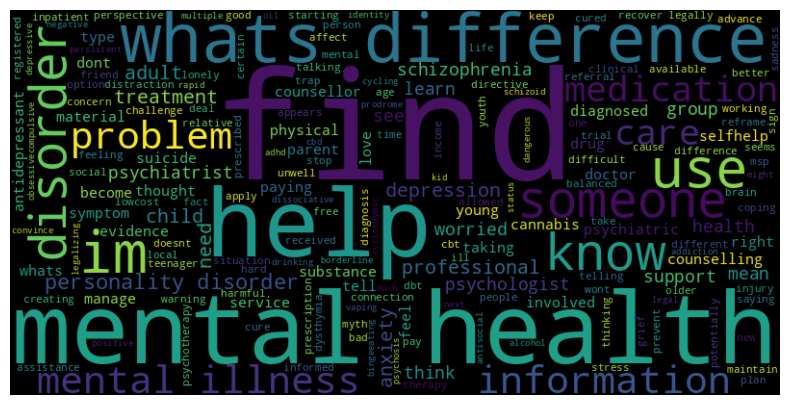

In [ ]:
# Function to join tokens into a single string
def join_tokens(tokens_list):
    return ' '.join(tokens_list)

# Apply the token joining function to the 'tokens' column
df_quest['text'] = df_quest['tokens'].apply(join_tokens)

# Combine the text from all rows
combined_text = ' '.join(df_quest['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

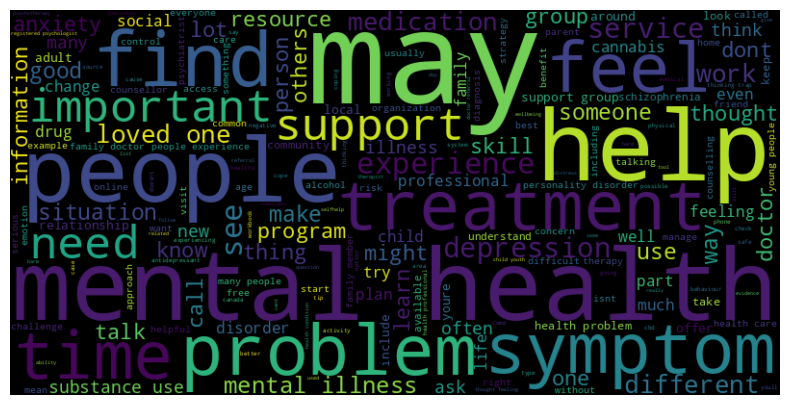

In [ ]:
# Apply the token joining function to the 'tokens' column
df_answ['text'] = df_answ['tokens'].apply(join_tokens)

# Combine the text from all rows
combined_text = ' '.join(df_answ['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Labelling

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_answ['AnswersEncode'] = label.fit_transform(df_answ['final'])
df_answ

Question_ID                                            Answers  \
0       1590140  Mental illnesses are health conditions that di...   
1       2110618  It is estimated that mental illness affects 1 ...   
3       9434130  Symptoms of mental health disorders vary depen...   
4       7657263  When healing from mental illness, early identi...   
5       1619387  Although this website cannot substitute for pr...   
..          ...                                                ...   
93      4373204  Sorting out if you are drinking too much can b...   
94      7807643  Cannabis smoke, for example, contains cancer-c...   
95      4352464  You can't. But you can influence their capacit...   
96      6521784  Cannabidiol or CBD is a naturally occurring co...   
97      3221856  "Vaping" is the term for using a device where ...   

                                                prep1  \
0   mental illnesses are health conditions that di...   
1   it is estimated that mental illness affects 1 ...   
3   symptoms of mental health disorders vary depen...   
4   when healing from mental illness, early identi...   
5   although this website cannot substitute for pr...   
..                                                ...   
93  sorting out if you are drinking too much can b...   
94  cannabis smoke, for example, contains cancer-c...   
95  you can't. but you can influence their capacit...   
96  cannabidiol or cbd is a naturally occurring co...   
97  "vaping" is the term for using a device where ...   

                                                prep3  \
0   mental illnesses are health conditions that di...   
1   it is estimated that mental illness affects  i...   
3   symptoms of mental health disorders vary depen...   
4   when healing from mental illness, early identi...   
5   although this website cannot substitute for pr...   
..                                                ...   
93  sorting out if you are drinking too much can b...   
94  cannabis smoke, for example, contains cancer-c...   
95  you can't. but you can influence their capacit...   
96  cannabidiol or cbd is a naturally occurring co...   
97  "vaping" is the term for using a device where ...   

                                                prep4  \
0   mental illnesses are health conditions that di...   
1   it is estimated that mental illness affects  i...   
3   symptoms of mental health disorders vary depen...   
4   when healing from mental illness early identif...   
5   although this website cannot substitute for pr...   
..                                                ...   
93  sorting out if you are drinking too much can b...   
94  cannabis smoke for example contains cancercaus...   
95  you cant but you can influence their capacity ...   
96  cannabidiol or cbd is a naturally occurring co...   
97  vaping is the term for using a device where li...   

                                                prep5  \
0   mental illnesses are health conditions that di...   
1   estimated that mental illness affects adults a...   
3   symptoms mental health disorders vary dependin...   
4   when healing from mental illness early identif...   
5   although this website cannot substitute for pr...   
..                                                ...   
93  sorting out you are drinking too much can comp...   
94  cannabis smoke for example contains cancercaus...   
95  you cant but you can influence their capacity ...   
96  cannabidiol cbd naturally occurring component ...   
97  vaping the term for using device where liquids...   

                                                prep6  \
0   mental illnesses are health conditions that di...   
1   estimated that mental illness affects adults a...   
3   symptoms mental health disorders vary dependin...   
4   when healing from mental illness early identif...   
5   although this website cannot substitute for pr...   
..                                                ...   
93  sorting out you are 

## Modelling:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [ ]:

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_quest['final'])

# Support Vector Machine (SVM) Classifier
model = SVC()
model.fit(X_train_tfidf, df_answ['AnswersEncode'])



SVC()

In [ ]:
search_test = {"Questions":[
    "How can I recover?",
    "Is cannabis dangerous?",
    "What is the side effect of drinking?",
    "What should I do if i know someone suffering form mental disorder?"
]}


In [ ]:
search_test=pd.DataFrame(search_test)

In [ ]:
search_test= search_test['Questions'].apply(to_lower)
search_test= search_test.apply(remove_number)
search_test= search_test.apply(remove_punct)
search_test= search_test.apply(to_strip)
search_test= search_test.apply(remove_char)
search_test= search_test.apply(remove_duplicate)
search_test= search_test.apply(remove_stopwords)
search_test= search_test.apply(lemma)

In [ ]:
search_engine = tfidf_vectorizer.transform(search_test)
result = model.predict(search_engine)

print(result)

[29 10 84  0]


In [ ]:

for question in result:
    df_data = df_answ.loc[df_answ.isin([question]).any(axis=1)]
    print("Answer: ", df_data['Answers'].values)

Answer:  ['When healing from mental illness, early identification and treatment are of vital importance. Based on the nature of the illness, there are a range of effective treatments available. For any type of treatment, it is essential that the person affected is proactive and fully engaged in their own recovery process.\nMany people with mental illnesses who are diagnosed and treated respond well, although some might experience a return of symptoms. Even in such cases, with careful monitoring and management of the disorder, it is still quite possible to live a fulfilled and productive life.']
Answer:  ['Cannabis smoke, for example, contains cancer-causing toxins. However, the risk of developing some cancers (e.g., mouth, tongue and lung) is less for cannabis smokers than tobacco smokers, partly because they tend to smoke less than tobacco users. And, while all drugs have an effect on the brain, the particular properties of the drug influence the level of risk of harmful consequences.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:527: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps_array, values)
